# Analysing IMDB Ratings over last 3 years 

1. Insigth 1 - I've watched movies from a total of 51 different years of release. The earliest being 1931.
2. The mean Rating given to mivies by me is 7.63, as opposed to 7.78 imdb average. (Kinda fall in line with the rest)
3. Average number of ratings of movies watched by me 293000, (not quite the hipster I thought I was.)
4. Average runtime of movies rated by me, 117 mins. (Almost 2 hours, Have always been comfortable with longer movies)
5. Standard deviation of ratings is 1.02 , as compared to 0.66 by the rest of the group. (More varied ratings by me)
6. My Median rating is 8 (generally rate movies favourably), imdb is 7.8
7. Median runtime is 115 mins, year is 2013, num_votes is 171000.
8. My Mode rating (most common) is 8 (so is imdbs), most movies watched from year 2018. Mode Runtime is 122 (sont think this is of any value).
9. Counting the genres of movies watched reveals my most commonly watched genres include (Comedy, Drama) - 34,Comedy, (Drama, Romance)-25, (Drama)-20, (Drama, Romance)-19, (Comedy, Romance)-10
10. Insight 2 - It is safe to say that I like, dramas, comedies, Roamance movies or a combination of them the most.
11. Surprisingly I'havent even rated a single movie from the year of my birth.
12. Most movies watched from a single director - Christopher nolan, Hirani, Spielberg, wes anderson, fincher.
13. With a stripplot of ratings vs year, it can be seen that I've rated older movies more favourably.

In [43]:
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ratings = pd.read_csv('ratings.csv', engine='python')

ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Const             400 non-null object
Your Rating       400 non-null int64
Date Rated        400 non-null object
Title             400 non-null object
URL               400 non-null object
Title Type        400 non-null object
IMDb Rating       400 non-null float64
Runtime (mins)    400 non-null int64
Year              400 non-null int64
Genres            400 non-null object
Num Votes         400 non-null int64
Release Date      399 non-null object
Directors         345 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 40.8+ KB


,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt10090796,8,2019-05-28,Game of Thrones: The Last Watch,https://www.imdb.com/title/tt10090796/,tvMovie,7.2,114,2019,Documentary,5117,2019-05-26,Jeanie Finlay
1,tt1010048,8,2016-10-18,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120,2008,"Drama, Romance",764678,2008-08-30,"Loveleen Tandan, Danny Boyle"
2,tt0101049,8,2016-10-18,A Bit of Fry and Laurie,https://www.imdb.com/title/tt0101049/,tvSeries,8.3,30,1987,Comedy,8629,1987-12-26,NaN
3,tt1022603,9,2019-06-21,(500) Days of Summer,https://www.imdb.com/title/tt1022603/,movie,7.7,95,2009,"Comedy, Drama, Romance",451803,2009-01-17,Marc Webb
4,tt1024648,7,2019-10-06,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120,2012,"Biography, Drama, Thriller",548036,2012-08-31,Ben Affleck


In [36]:
# ratings.dropna(inplace = True)
# ratings.loc[ratings['Title Type']=='movie']

ratings['Title Type'].value_counts()

movie      341
tvMovie      1
video        1
short        1
Name: Title Type, dtype: int64

In [185]:
# lets see how how many different years I've seen movies from

# filtering out just movies using df.loc[condition]
ratings = ratings.loc[ratings['Title Type']=='movie']

# DataFrame.loc - Access a group of rows and columns by label(s) or a boolean array.

#filtering out tvSeries 
#ratings = ratings.loc[ratings['Title Type']=='tvSeries']


ratings.describe()


no_unique_years = ratings['Year'].unique().tolist()

print(len(no_unique_years))

#print(no_unique_years)
no_unique_years.sort()
print(no_unique_years,'\n')
print(ratings.describe(), '\n')

print('Median values\n',ratings.median(numeric_only=True), '\n')
print('Mode of Dataset\n',ratings.mode(numeric_only=True), '\n')

genres = ratings['Genres'].unique().tolist()
print("No. of movie genres\n",len(genres))
#print(genres)

print("\n\nCount of each Genre \n\n",ratings['Genres'].value_counts().to_string())

51
[1931, 1940, 1951, 1955, 1956, 1957, 1958, 1959, 1964, 1965, 1967, 1968, 1971, 1975, 1976, 1977, 1982, 1984, 1985, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

       Your Rating  IMDb Rating  Runtime (mins)         Year     Num Votes
count   342.000000   342.000000      342.000000   342.000000  3.420000e+02
mean      7.587719     7.663158      122.426901  2007.850877  3.102015e+05
std       1.042876     0.603207       26.341190    14.596167  3.653274e+05
min       3.000000     4.600000       60.000000  1931.000000  3.700000e+01
25%       7.000000     7.300000      104.000000  2006.000000  3.709675e+04
50%       8.000000     7.700000      118.000000  2013.000000  1.915750e+05
75%       8.000000     8.100000      135.000000  2017.000000  4.376748e+05
max      10.000000     9.300000      321.000000  2020.000000  2.181155e+06 

Median valu

In [5]:
# number of unique directors whose films I've watched, returns list 
directors = ratings['Directors'].unique().tolist()

# Most films by a particular director I've watched.

#print(directors.value_counts()) # value_counts works only for pandas dataframe/series

# for printing entire dataframe, convert it to string using to_string method.

print(ratings['Directors'].value_counts().to_string())

Christopher Nolan                                             6
Rajkumar Hirani                                               5
Satyajit Ray                                                  4
David Fincher                                                 4
Steven Spielberg                                              4
Wes Anderson                                                  4
Rob Reiner                                                    3
Sam Mendes                                                    3
Martin Scorsese                                               3
Shoojit Sircar                                                3
Dibakar Banerjee                                              3
James Wan                                                     3
Ashutosh Gowariker                                            3
Jonathan Levine                                               3
Zoya Akhtar                                                   3
John Carney                             

In [186]:
# Title analysis 
import random
from wordcloud import WordCloud, STOPWORDS

text = ratings['Title'].to_string()

text_cloud = str(text.split())
text_df = text.split()

newdf = pd.DataFrame(data = text_df)
newdf[0].value_counts()


The          61
of           22
the          18
2             9
to            7
             ..
Old           1
King          1
Wasseypur     1
Skyfall       1
305           1
Name: 0, Length: 970, dtype: int64

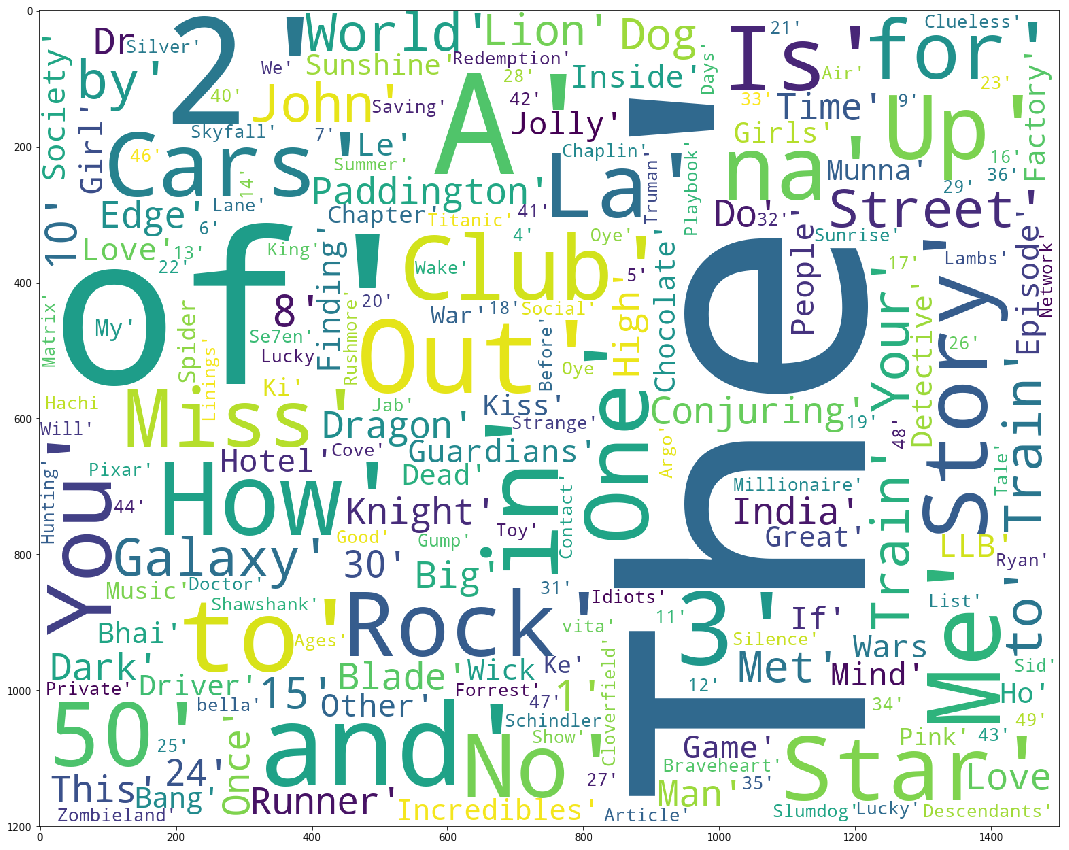

In [187]:
plt.subplots(figsize = (20,15))
wordcloud = WordCloud(
                        stopwords= STOPWORDS,
background_color = 'white',
width =1500,
height = 1200).generate(text_cloud)

plt.imshow(wordcloud)
plt.show()

The total number of movies with  Action = 63
The total number of movies with  Adventure = 70
The total number of movies with  Animation = 25
The total number of movies with  Biography = 39
The total number of movies with  Comedy = 141
The total number of movies with  Crime = 35
The total number of movies with  Drama = 234
The total number of movies with  Fantasy = 39
The total number of movies with  Family = 42
The total number of movies with  History = 14
The total number of movies with  Horror = 12
The total number of movies with  Music = 43
The total number of movies with  Musical = 18
The total number of movies with  Mystery = 28
The total number of movies with  Romance = 84
The total number of movies with  Sci-Fi = 44
The total number of movies with  Sport = 17
The total number of movies with  Thriller = 66
The total number of movies with  War = 12
The total number of movies with  Western = 2


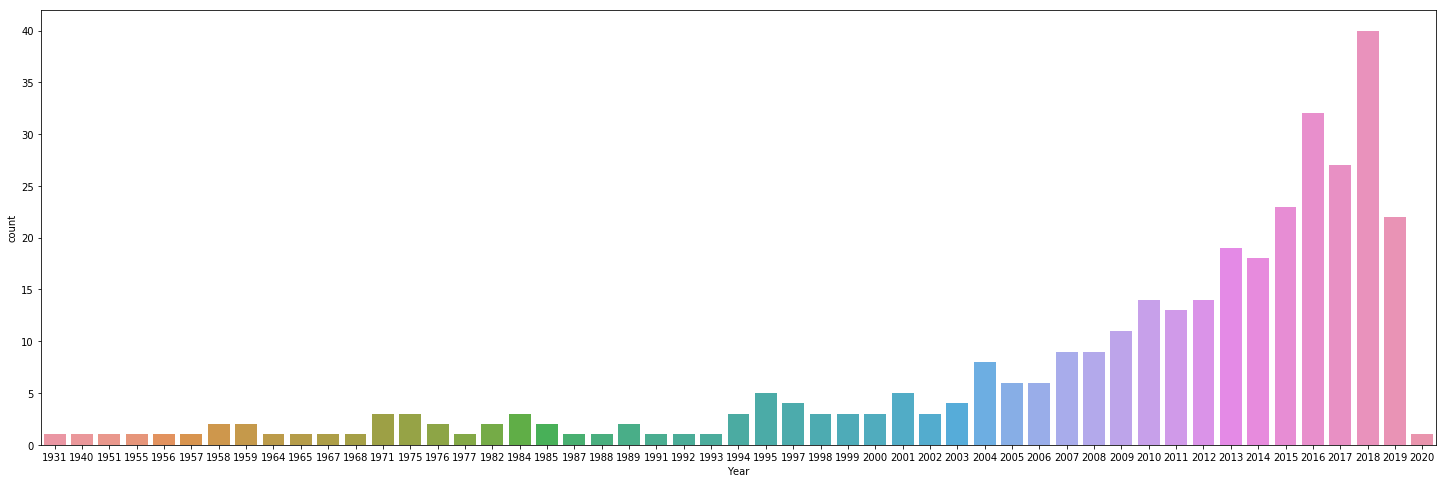

In [112]:
%matplotlib inline 
import seaborn as sns

seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'

type(seperate_genre)   # tuple, just writing a collection of strings with commas creates a tuple.

for genre in seperate_genre :
    n_df = ratings['Genres'].str.contains(genre).fillna(False)    # create new dataframe that contains only rows with genres listed above 
    print("The total number of movies with ", genre, '=' , len(ratings[n_df]))   # filtering for dataframe, dataframe[dataframe] 
    #print(ratings[n_df])
#plt.xlabel(ratings['Genres'])

# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable
#plt.hist(gen_str.split(','),354)
ratings_1 = ratings.head(20)
plt.figure(figsize=(25,8))
ax = sns.countplot(x="Year", data=ratings)
#plt.show()
plt.savefig("Movies_years_count.svg")

   Year    Title
0  2008  Movie 1
1  2011  Movie 2
2  2015  Movie 3
3  2002  Movie 4
4  1954  Movie 5
5  1999  Movie 6
6  2006      NaN
0    2008
1    2011
2    2015
3    2002
4    1954
5    1999
6    2006
dtype: int64


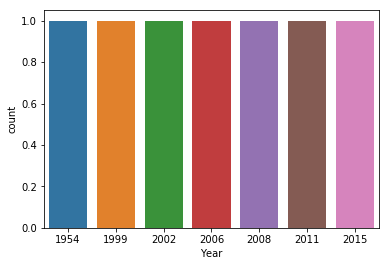

In [24]:
import seaborn as sns
import pandas as pd

sr = pd.Series([2008,2011,2015,2002,1954,1999, 2006])

sr.head()

idx = ['Movie 1', 'Movie 2','Movie 3', 'Movie 4', 'Movie 5','Movie 6']


ttl = pd.Series(idx)

#sr.index = idx

sr.head()

dic = {'Year' : sr, 'Title' : ttl} 

# dic = {'Year' : sr, 'Title' : ttl, 'Name' : idx}   
# error ValueError: array length 6 does not match index length 7

# when creating datframe using a dictionary of lists, even a single list length doesn't match pandas throws an error.
# but when using pandas series to create a dataframe using same list , it automatically puts NaN in out of bound/missing
df = pd.DataFrame(dic)

ax = sns.countplot(x = "Year", data = df) # seaborn works without matplotlib here 
print(df)

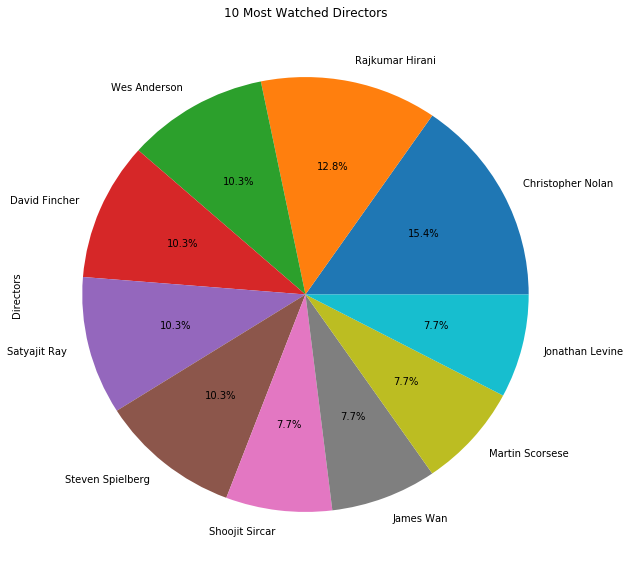

In [100]:
# create pichart of my most watched directors.

# slicing pandas series to first 10 values
type(ratings['Directors'].value_counts()[:10])


# pandas dataframe.plot.pie wraps matplotlib.plot.pie

ratings['Directors'].value_counts()[:10].plot.pie(autopct = "%1.1f%%",figsize = (10,10))
plt.title("10 Most Watched Directors" )
plt.savefig("10_most_watched_directors.svg")
plt.show()

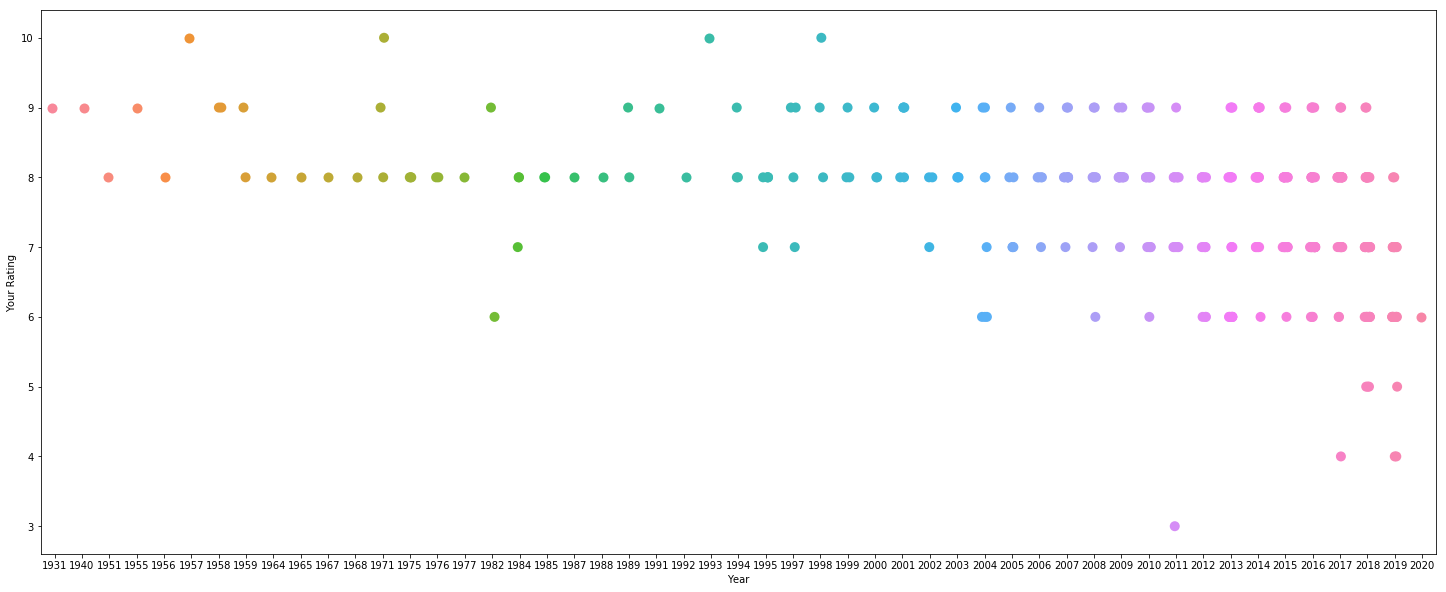

In [101]:
# creating stripplot(type of scatterplot) to see relationship between year of films' release and my rating

plt.figure(figsize = (25,10))
sns.stripplot(x="Year", y = "Your Rating", data = ratings, size =10)
#plt.savefig("Strip_plot_yearvsrating.svg")

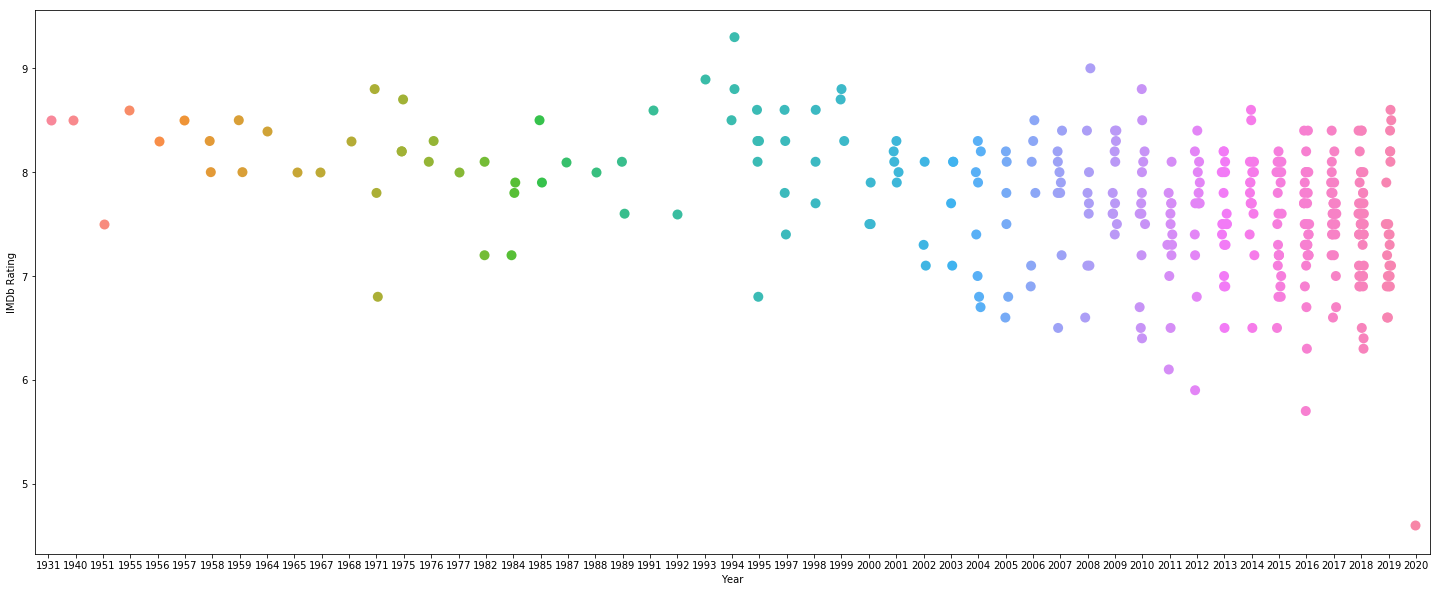

In [102]:
# Relationship between Year of releaase and IMDB Rating
plt.figure(figsize = (25,10))
sns.stripplot(x = "Year", y = "IMDb Rating", data = ratings, size = 10)
#plt.savefig("Strip_plot_yearvsIMDbrating.svg")

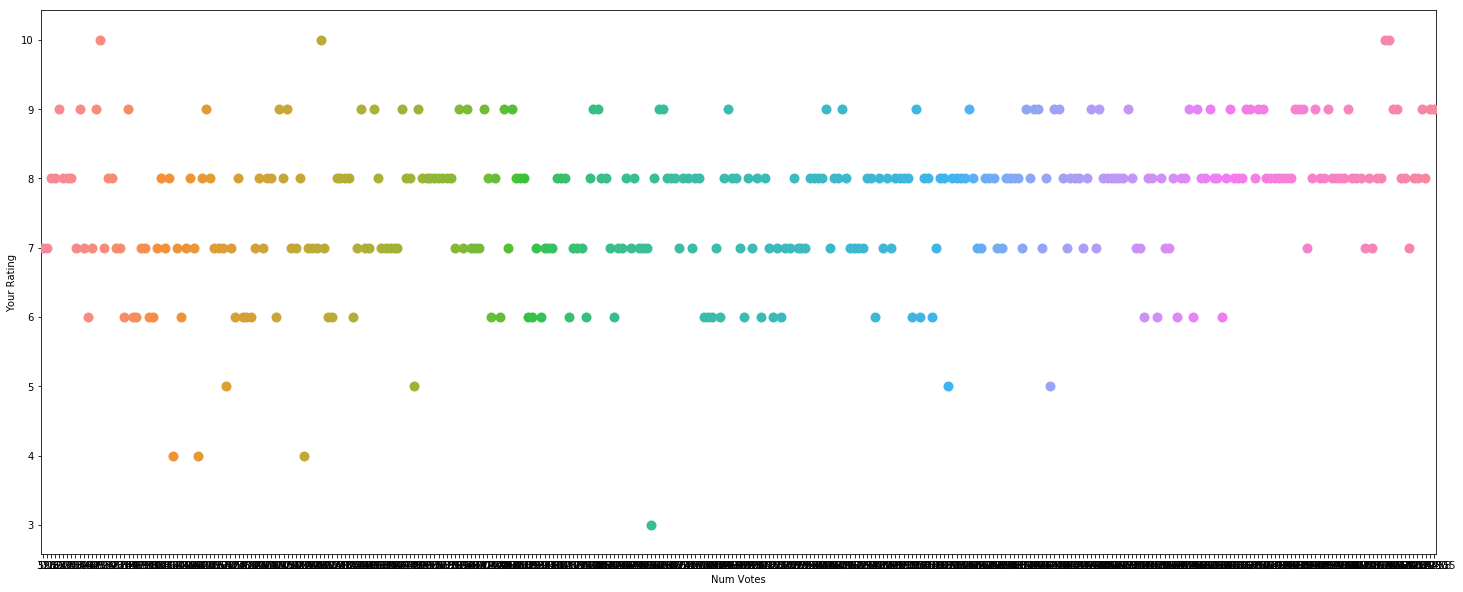

In [103]:
# checking relation between how popular the movie is and my rating 
plt.figure(figsize = (25,10))
sns.stripplot(x = "Num Votes", y = "Your Rating", data = ratings, size = 10)
#plt.savefig("Strip_plot_yearvsIMDbrating.svg")

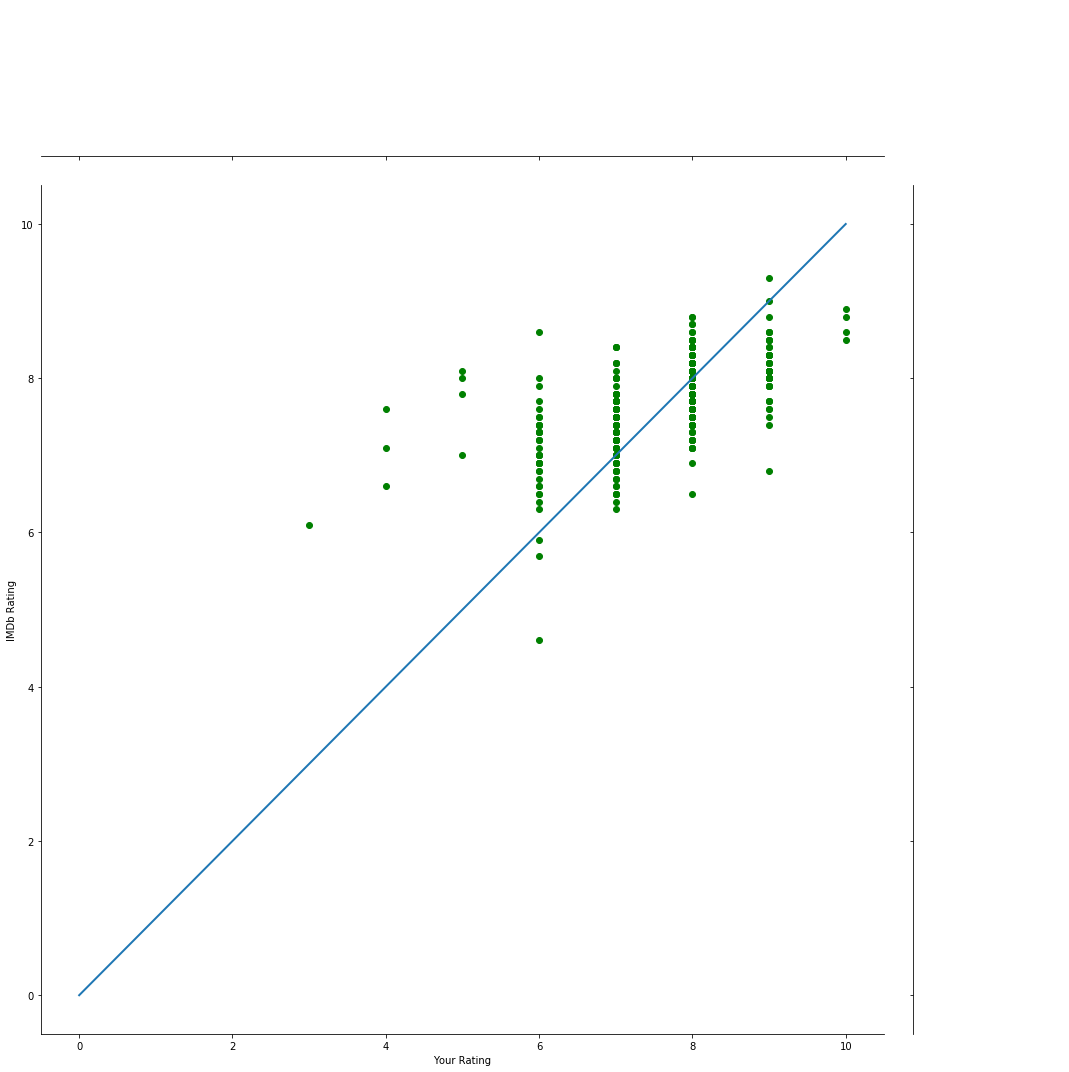

In [303]:
#### Trying to Plot my ratings vs IMDB ratings on plot with equal Axis 


#%matplotlib inline
#plt.figure(figsize = (8,8))
#plt.axis((0,10,0,10))
#plt.axis('equal')
#plt.xlim(4, 10)
#plt.ylim(4, 10)
#plt.gca().set_aspect('equal', adjustable='box')
#sns.stripplot(x = "Your Rating", y = "IMDb Rating", data = ratings, size = 10)#, jitter = True)
#sns.scatterplot(x = "Your Rating", y = "IMDb Rating", data = ratings, size = 20)
#sns.lineplot(x='Your Rating',y='IMDb Rating', data=ratings)

grid = sns.JointGrid(x = "Your Rating", y = "IMDb Rating", data = ratings, height = 15)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 10], [0, 10], linewidth=2)

#ratings.plot.scatter("Your Rating", "IMDb Rating")
#ratings.plot(figsize=(50,50))
plt.savefig("scatterplot_your_vs_imdb.svg")
#plt.show()



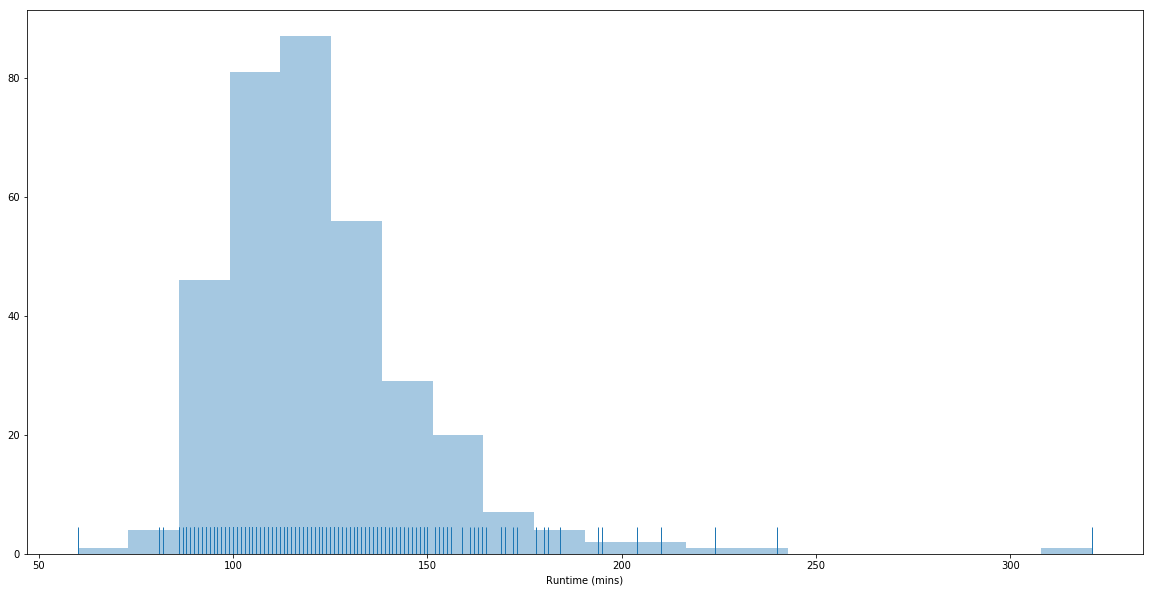

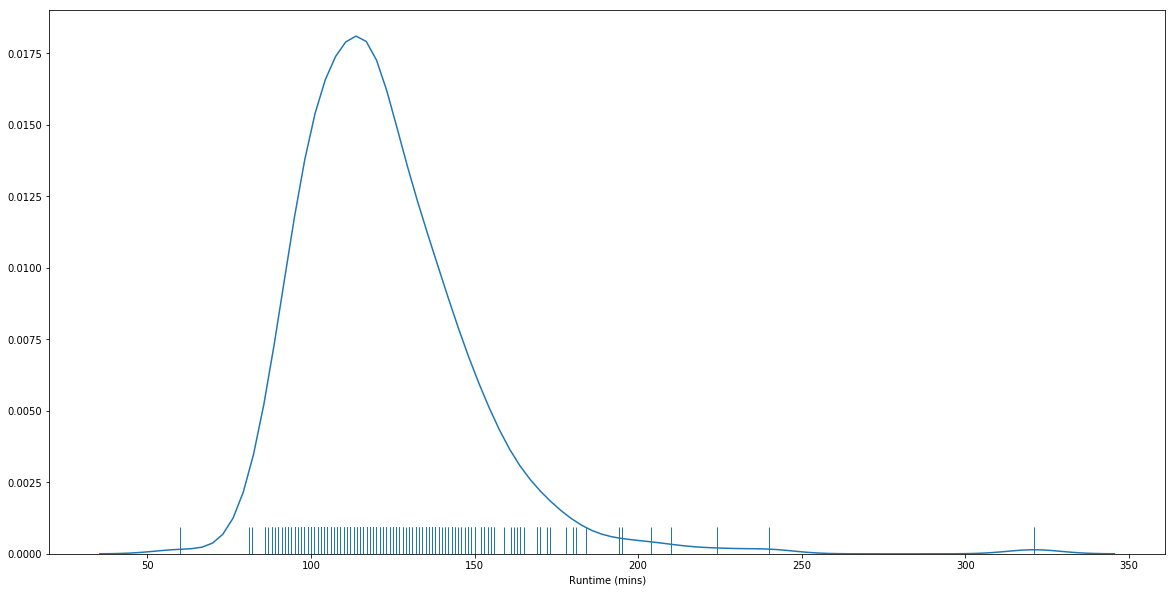

In [104]:
time = ratings['Runtime (mins)']

# display histogram using seaborn 

plt.figure(figsize = (20,10))
sns.distplot(time, bins = 20, kde = False, rug = True)
plt.show()

# displaying as a curve
plt.figure(figsize = (20,10))
sns.distplot(time, hist = False, rug =True)
plt.show()

The total number of movies with  Action = 63


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


The total number of movies with  Adventure = 70
The total number of movies with  Animation = 25
The total number of movies with  Biography = 39
The total number of movies with  Comedy = 141
The total number of movies with  Crime = 35


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The total number of movies with  Drama = 234
The total number of movies with  Fantasy = 39
The total number of movies with  Family = 42
The total number of movies with  History = 14
The total number of movies with  Horror = 12
The total number of movies with  Music = 43
The total number of movies with  Musical = 18
The total number of movies with  Mystery = 28
The total number of movies with  Romance = 84
The total number of movies with  Sci-Fi = 44
The total number of movies with  Sport = 17
The total number of movies with  Thriller = 66
The total number of movies with  War = 12
The total number of movies with  Western = 2


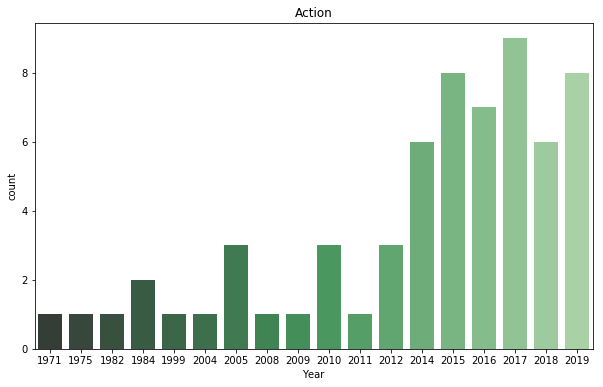

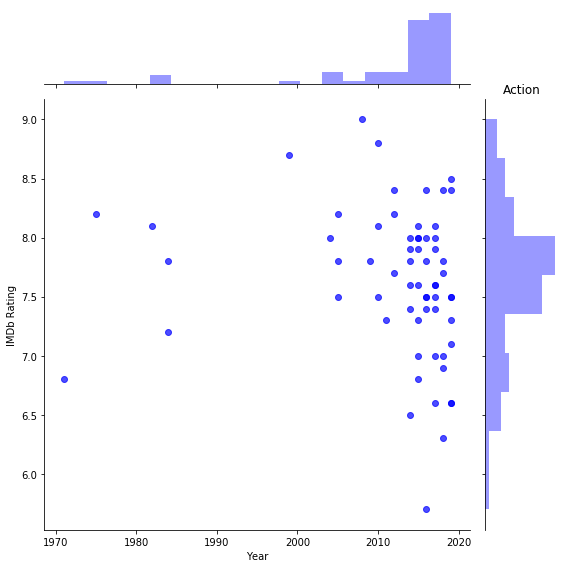

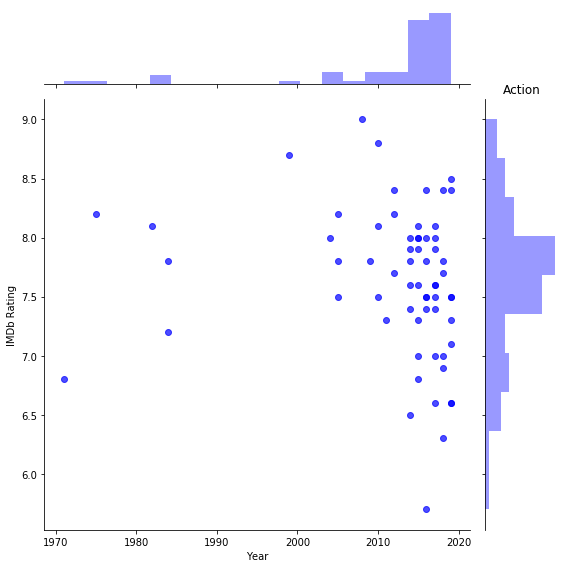

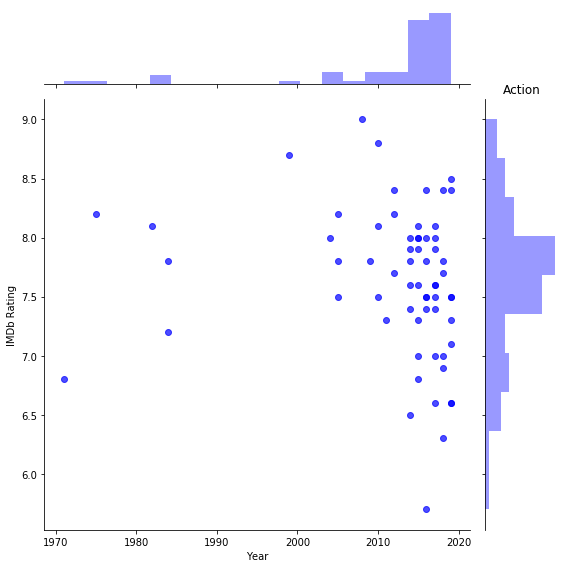

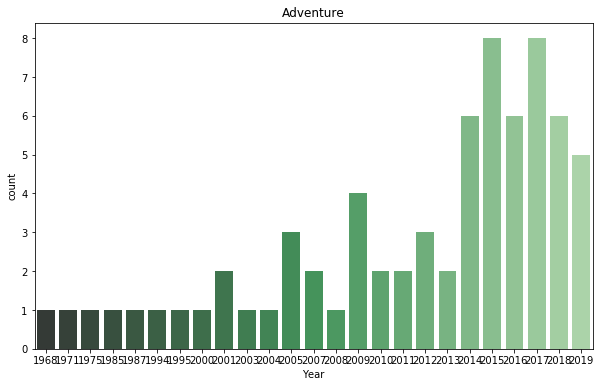

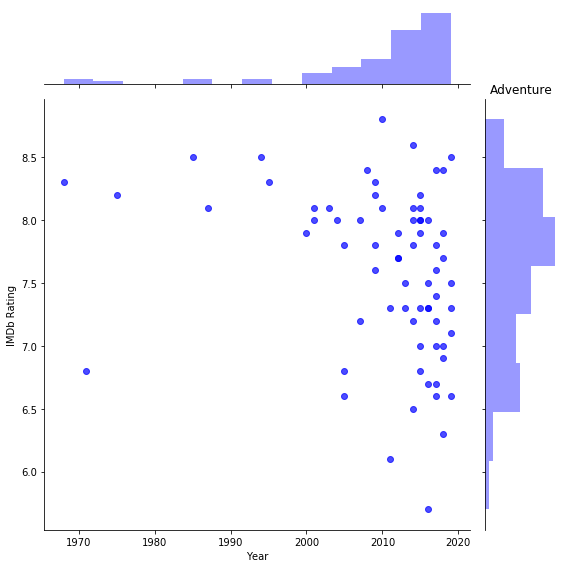

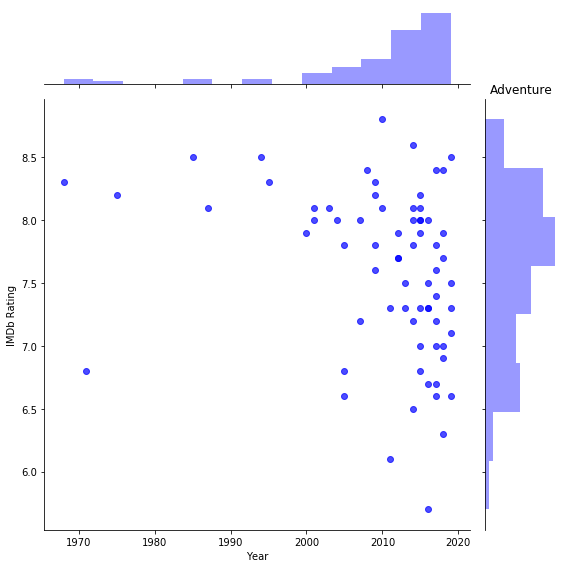

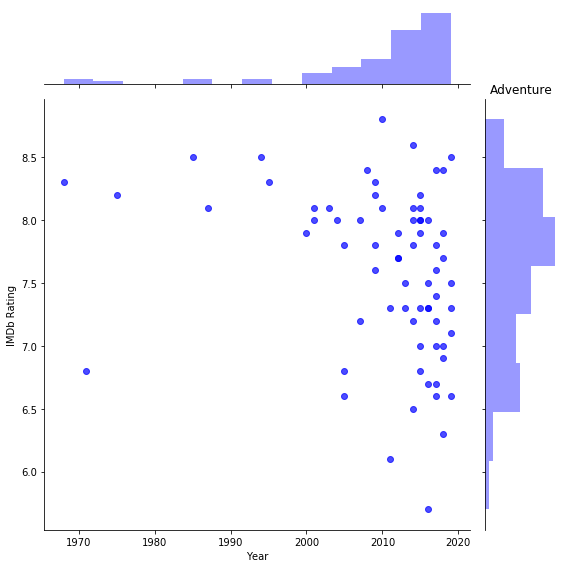

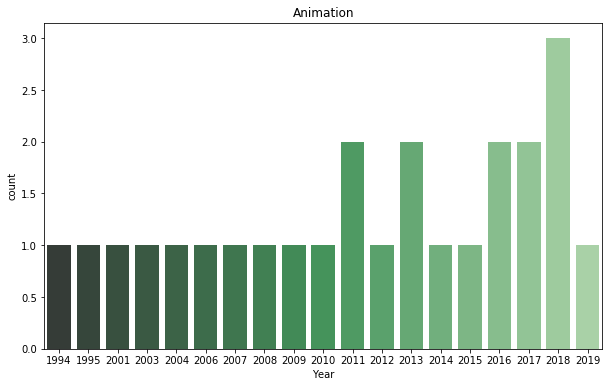

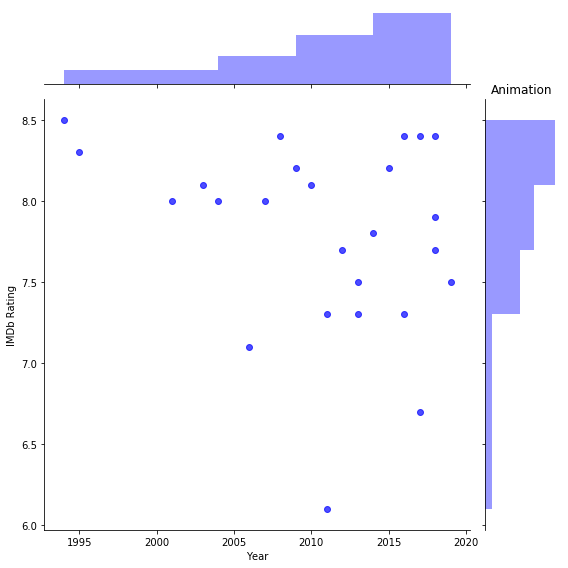

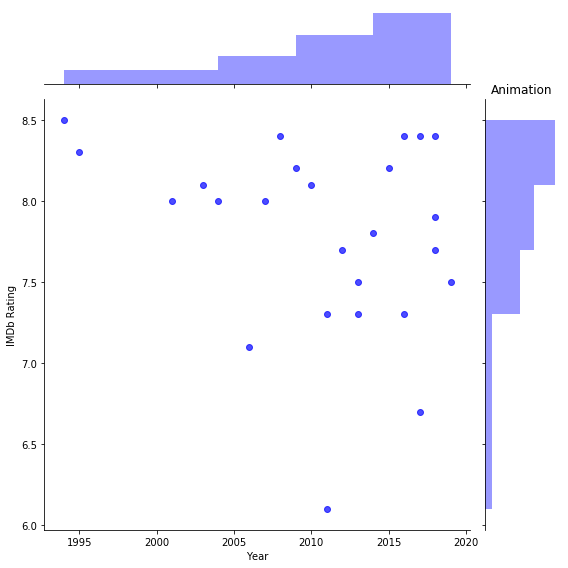

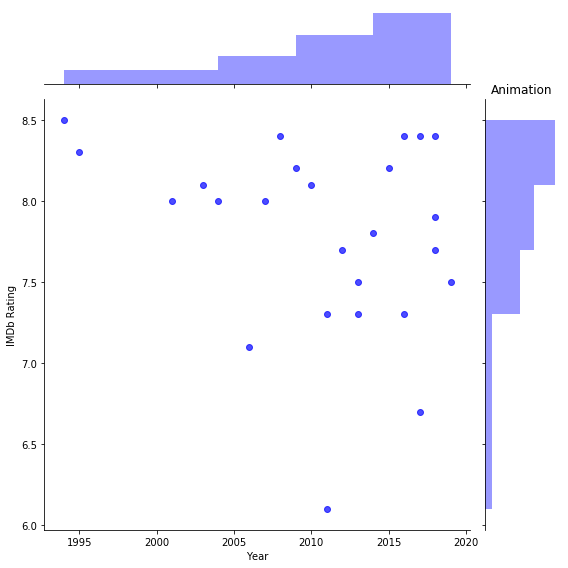

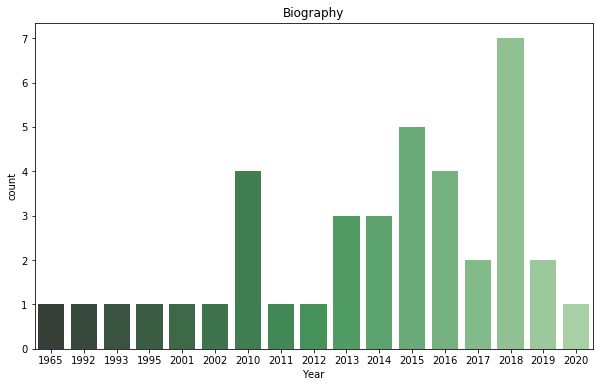

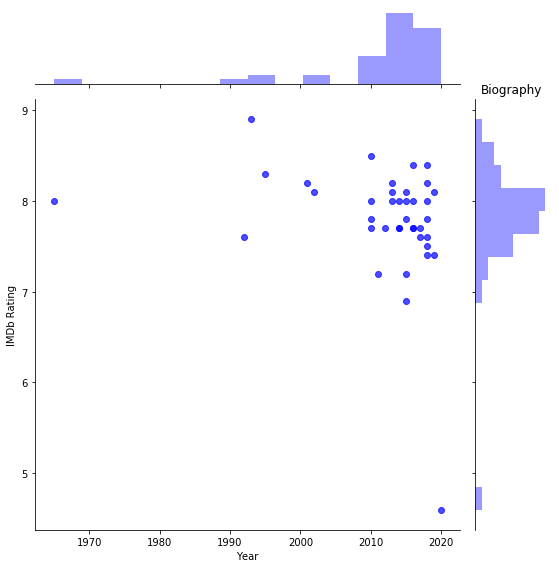

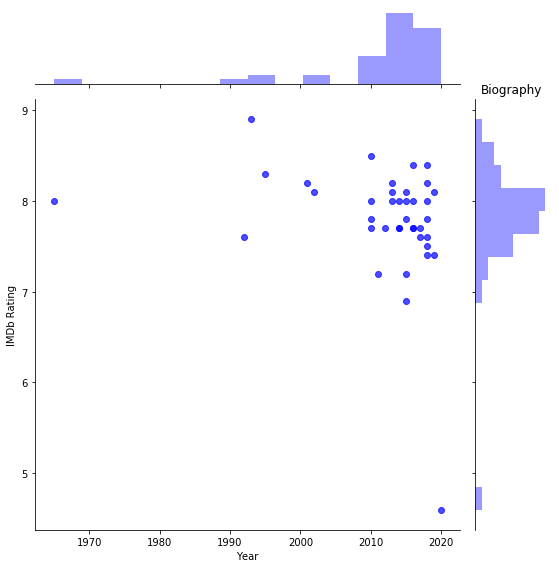

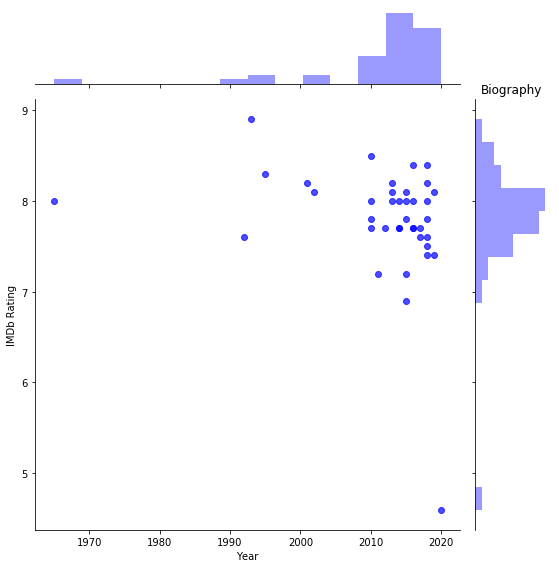

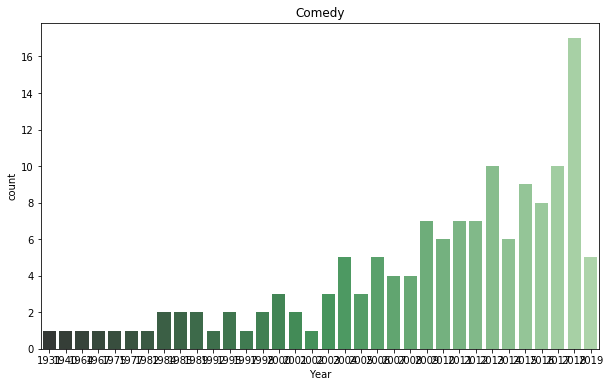

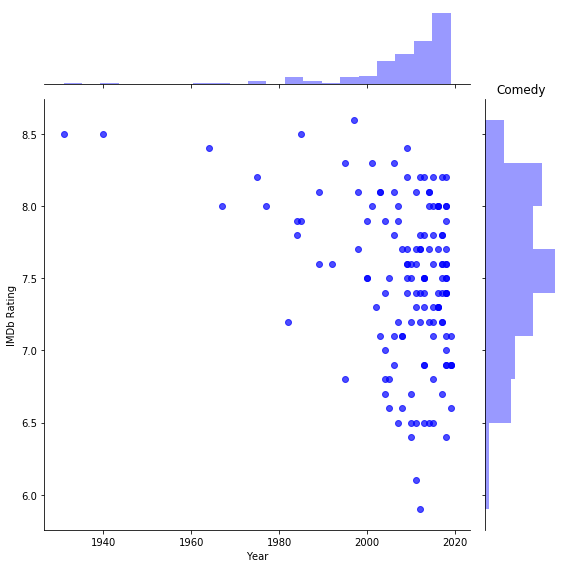

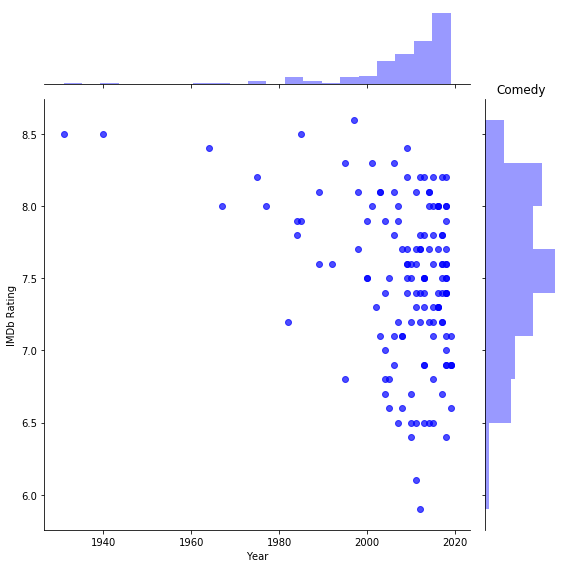

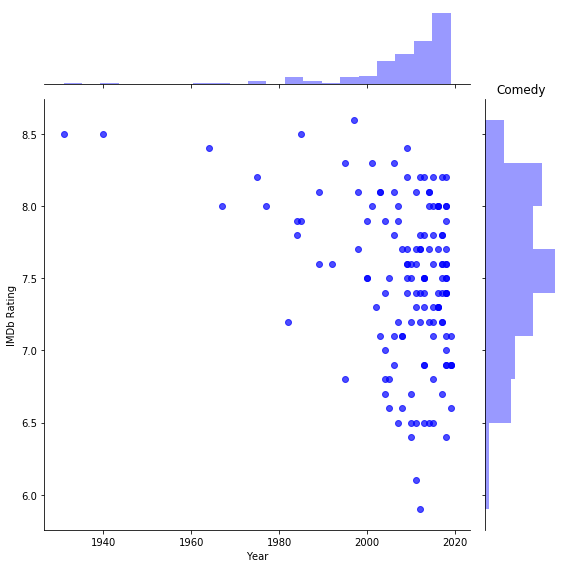

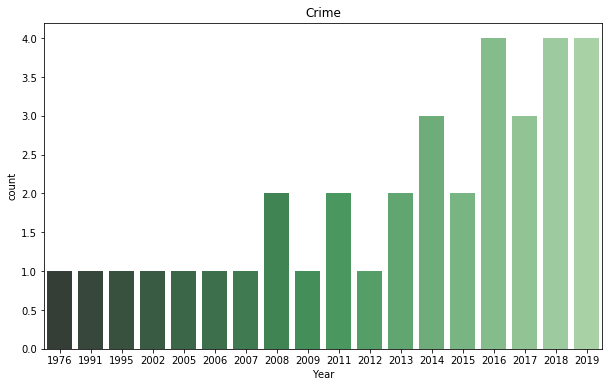

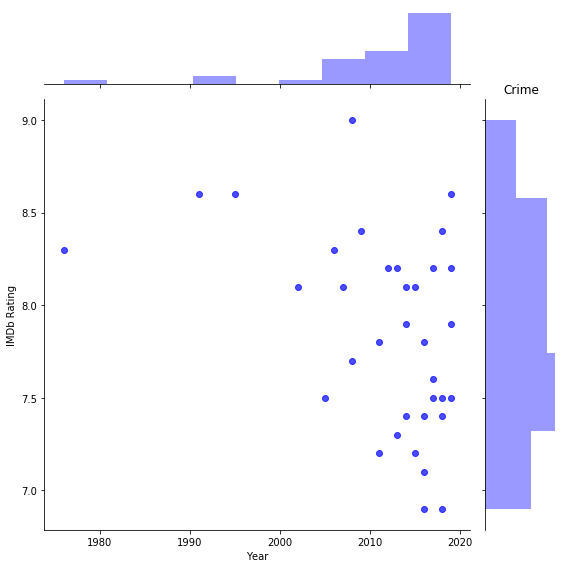

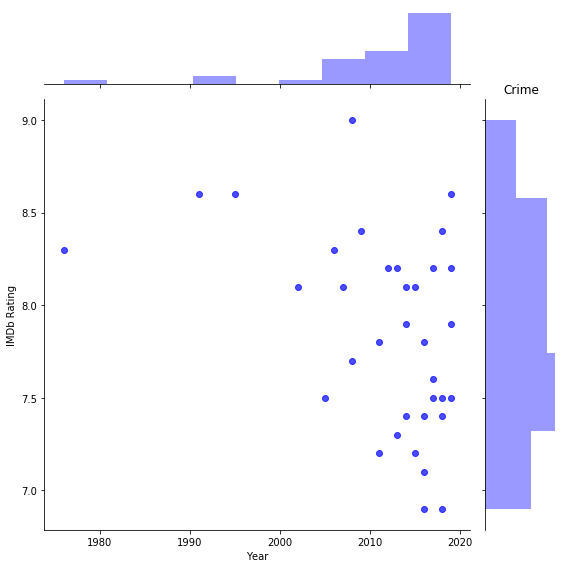

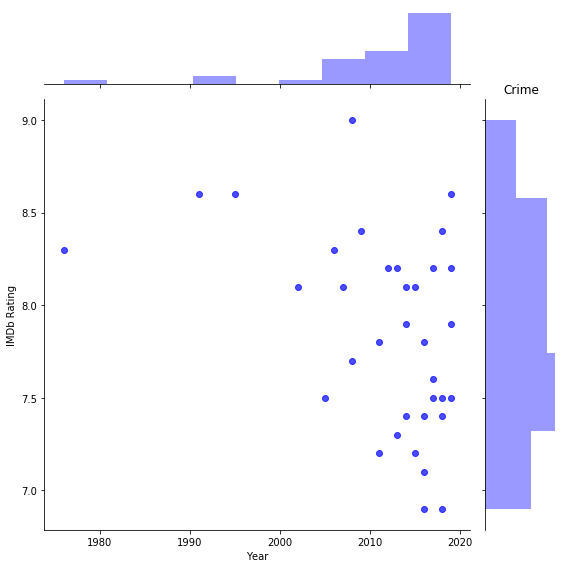

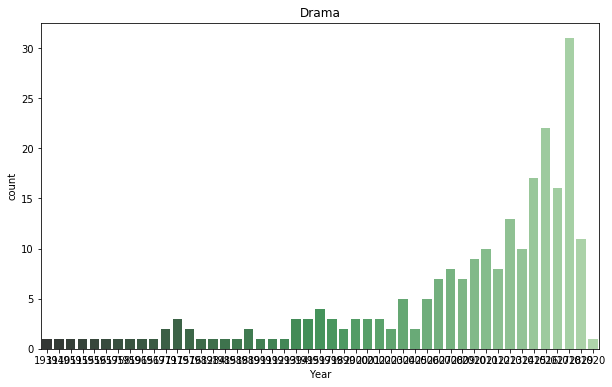

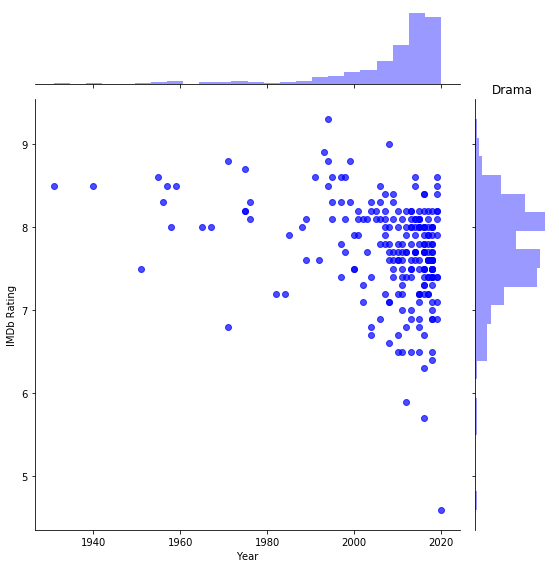

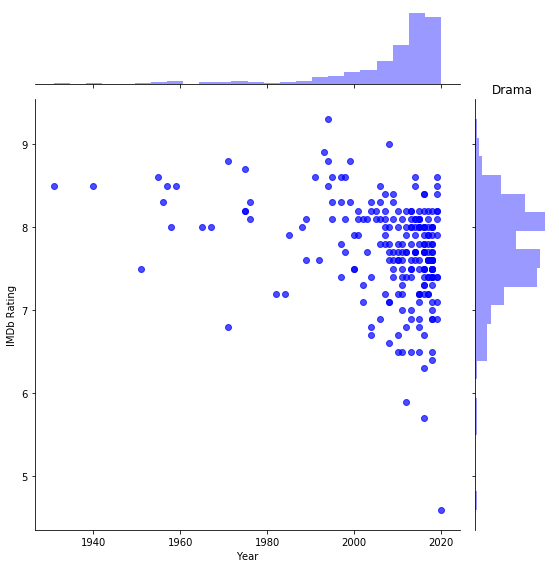

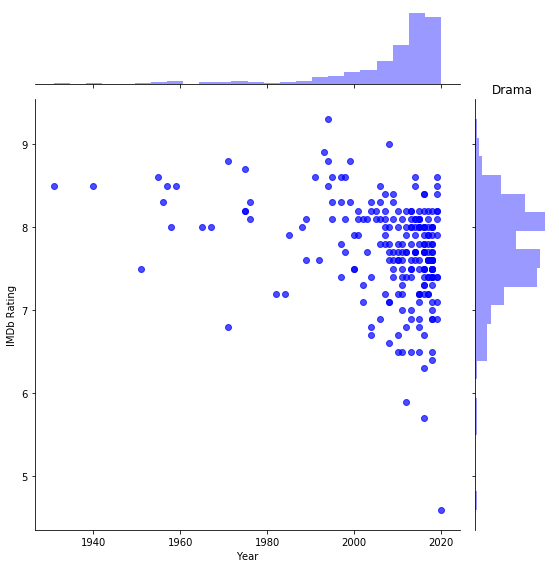

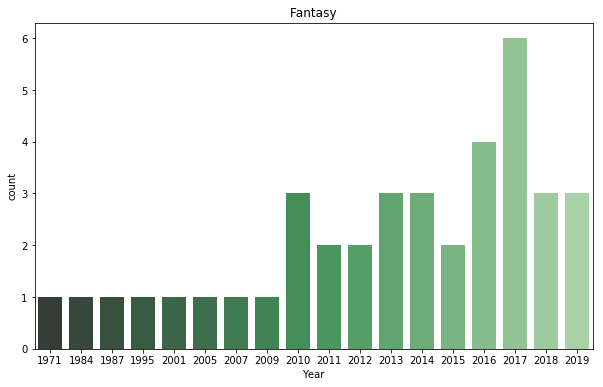

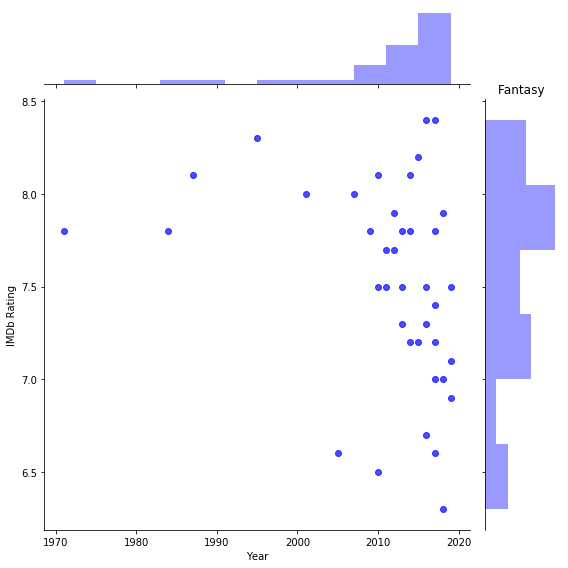

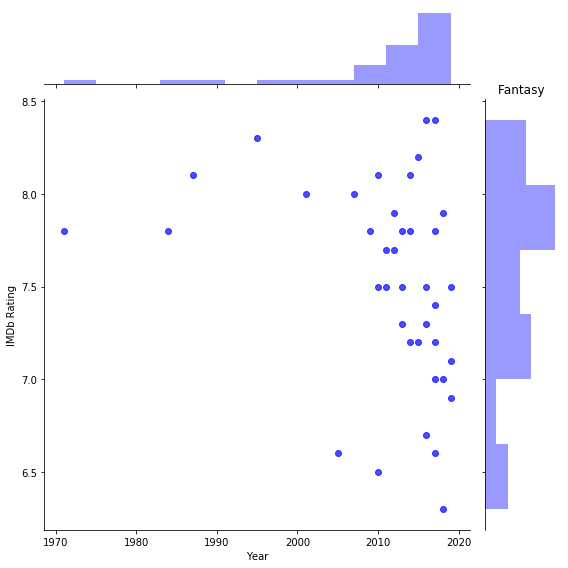

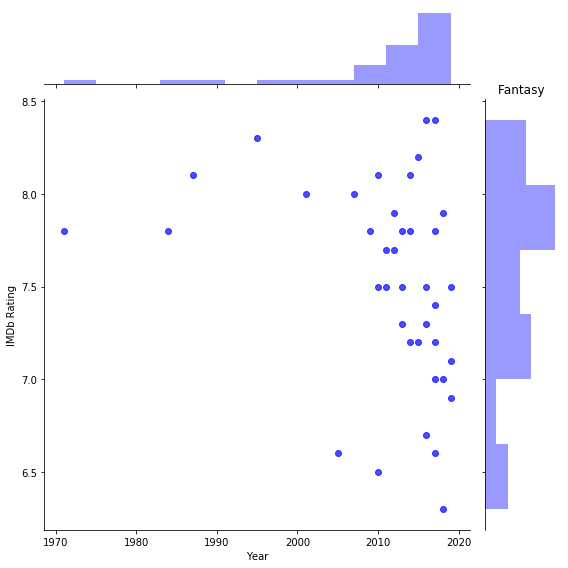

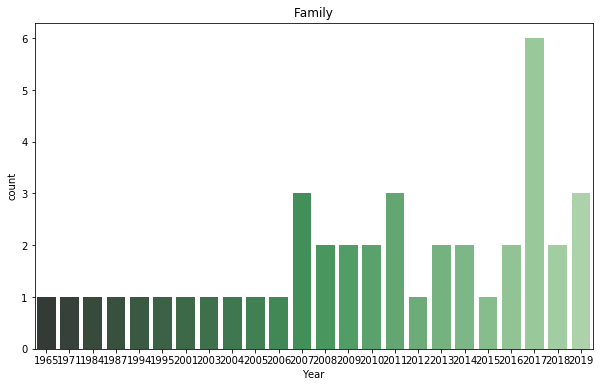

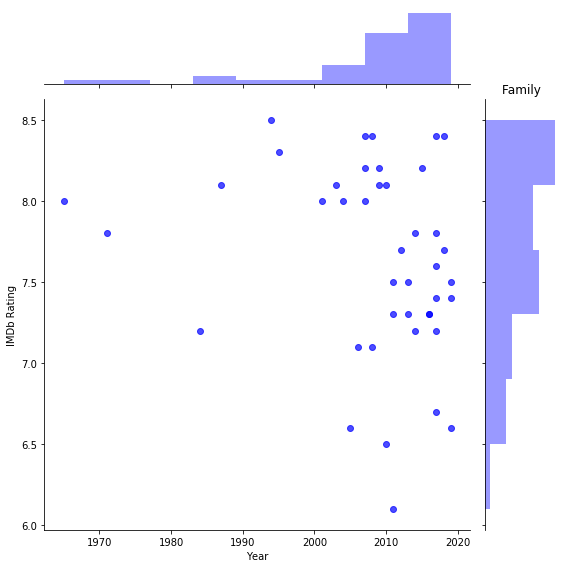

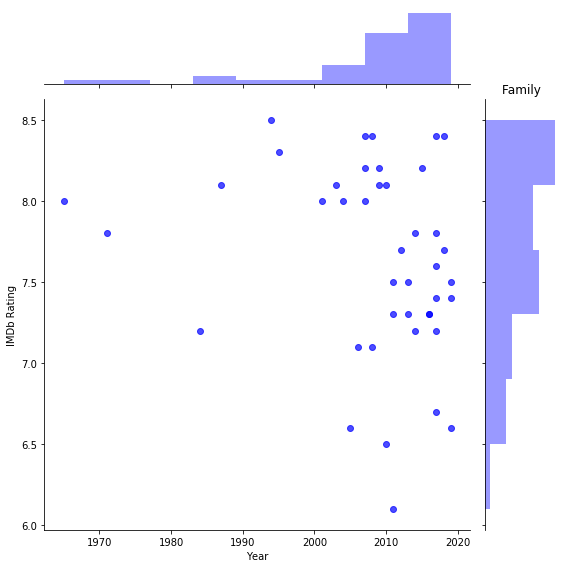

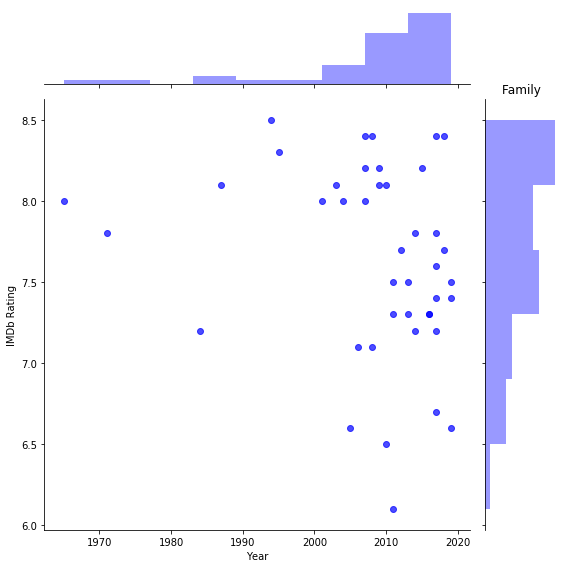

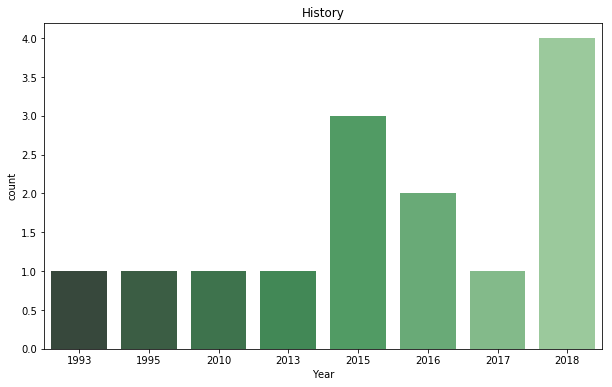

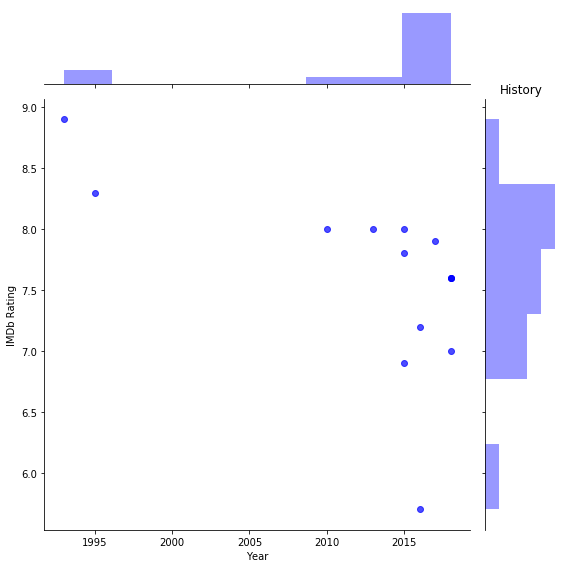

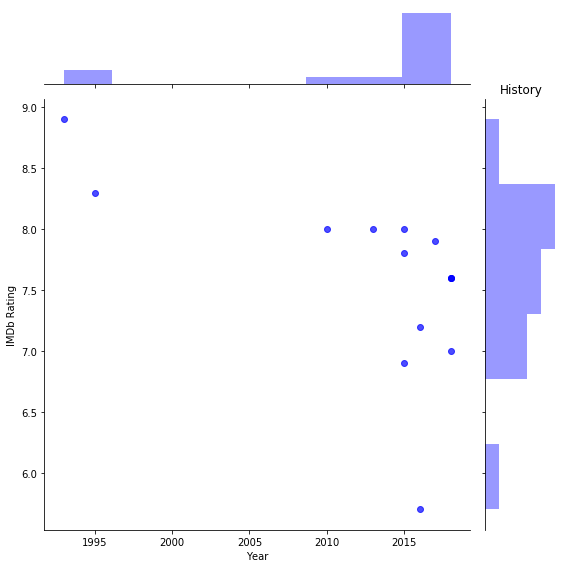

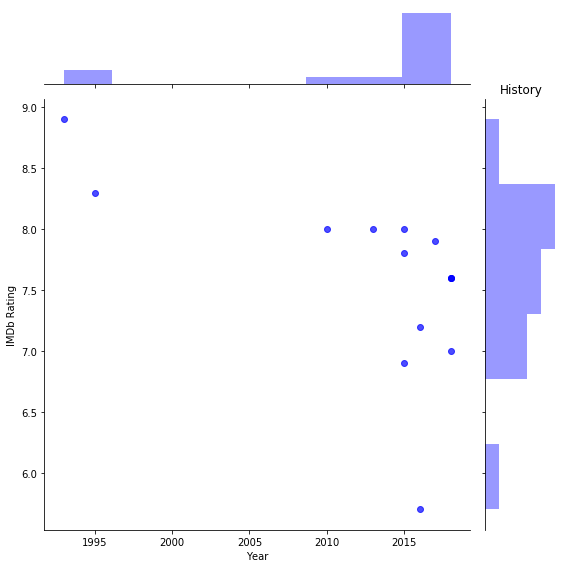

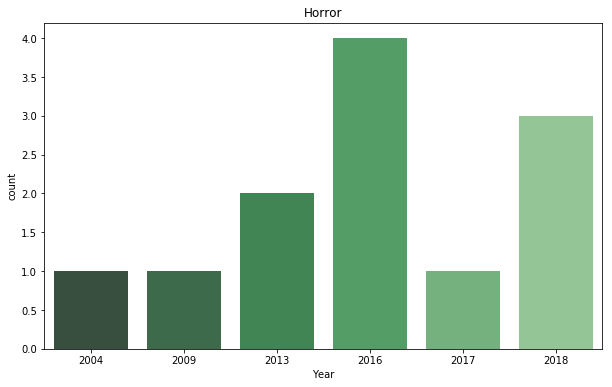

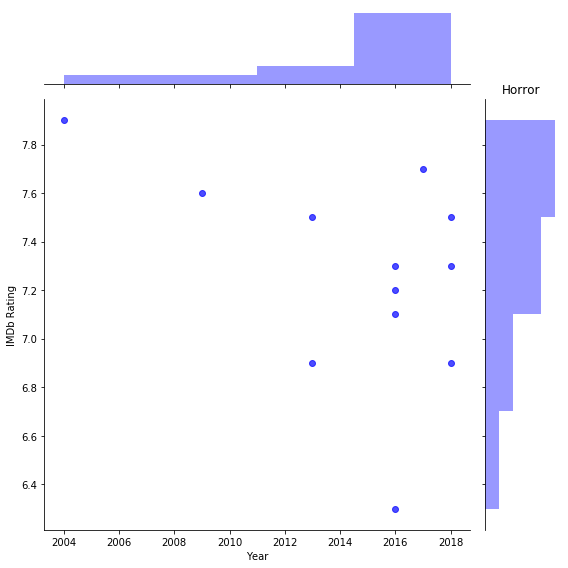

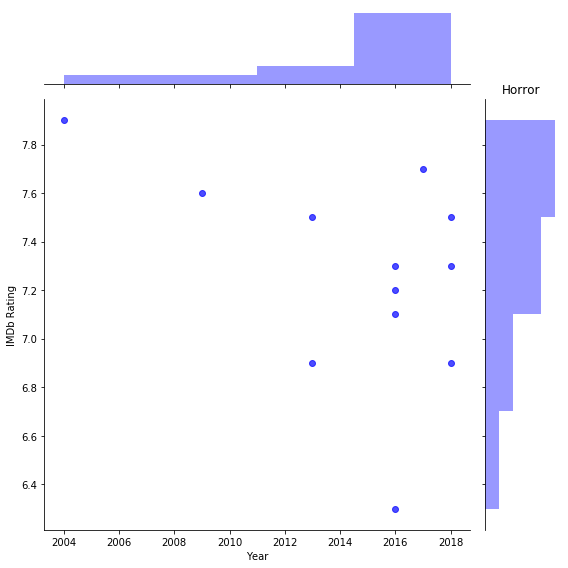

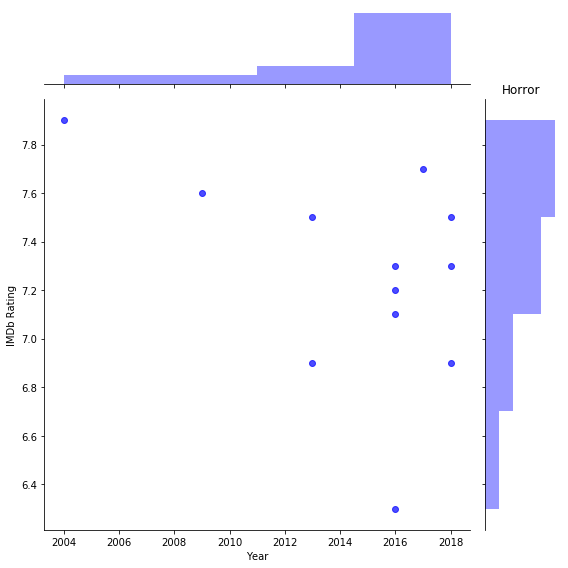

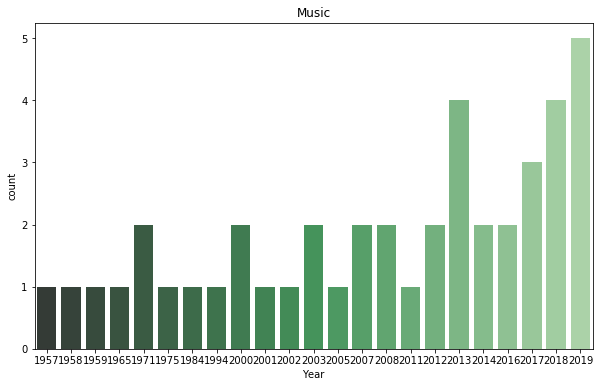

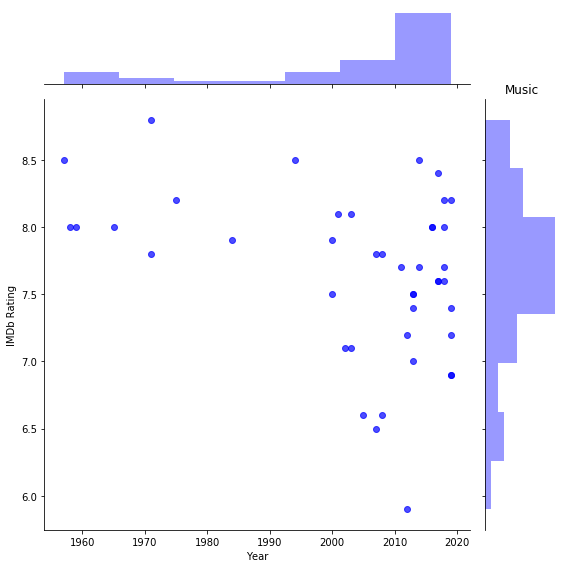

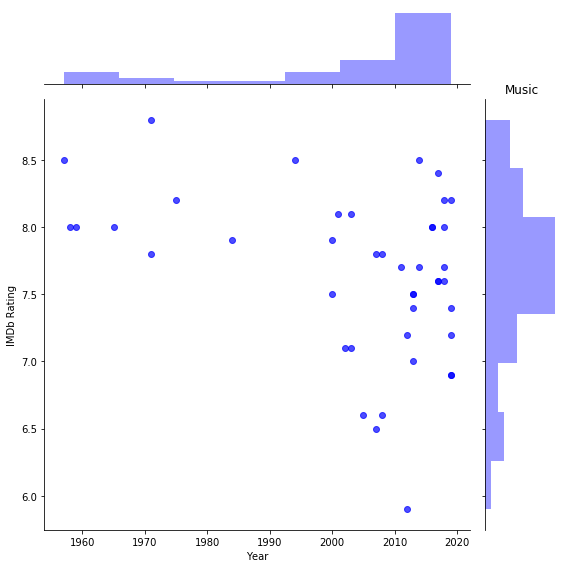

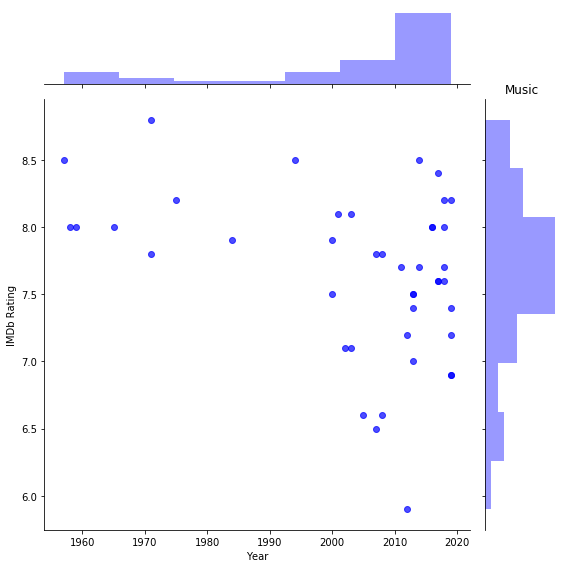

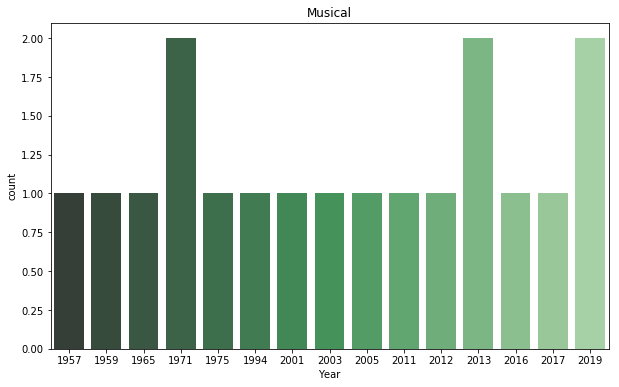

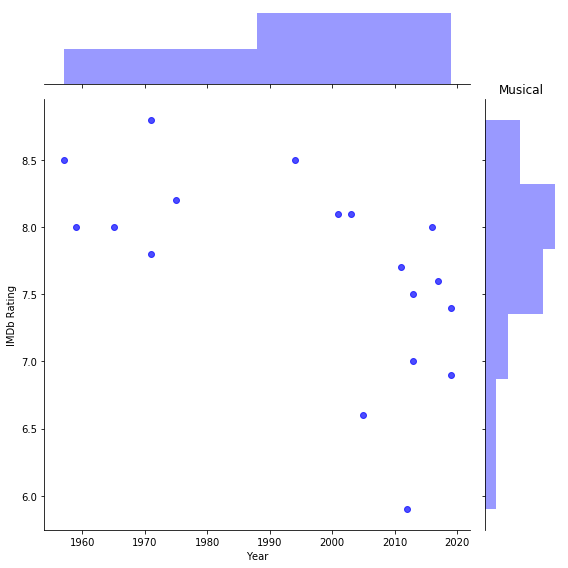

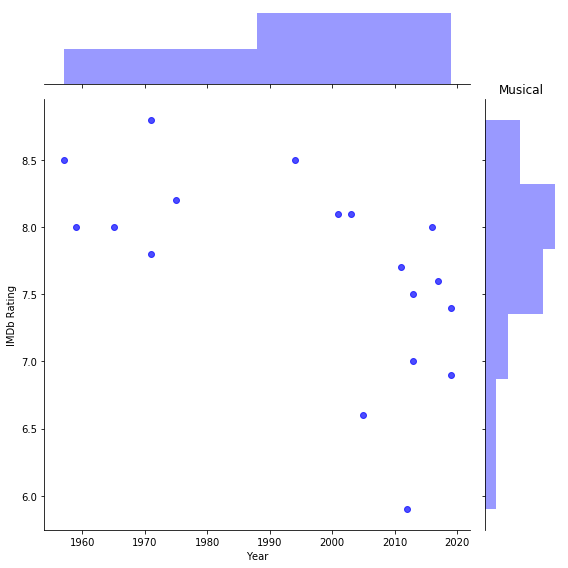

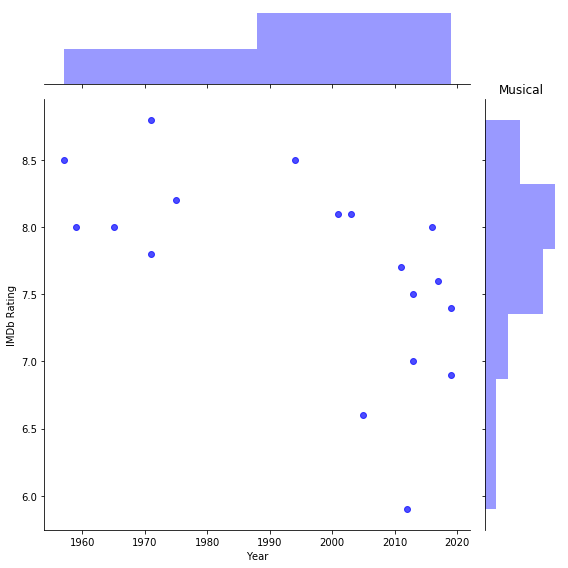

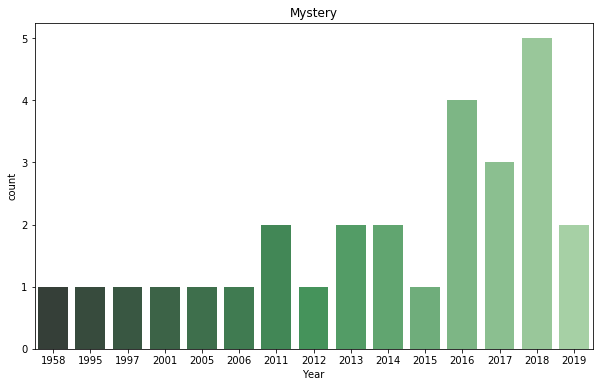

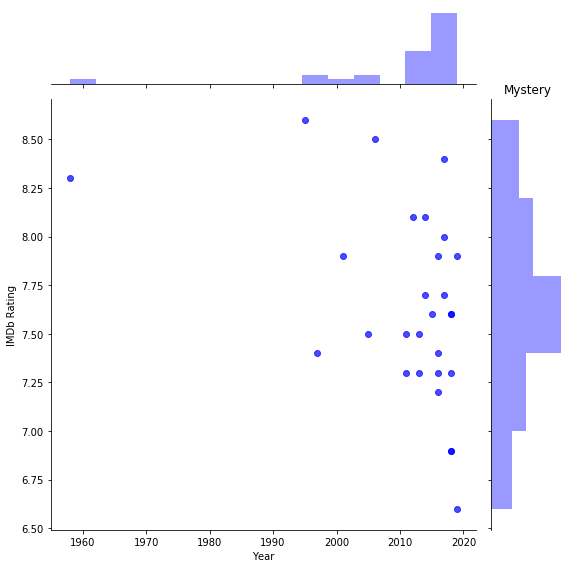

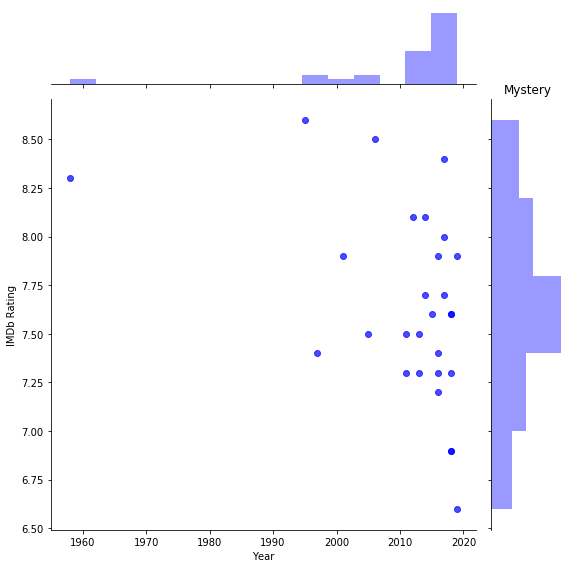

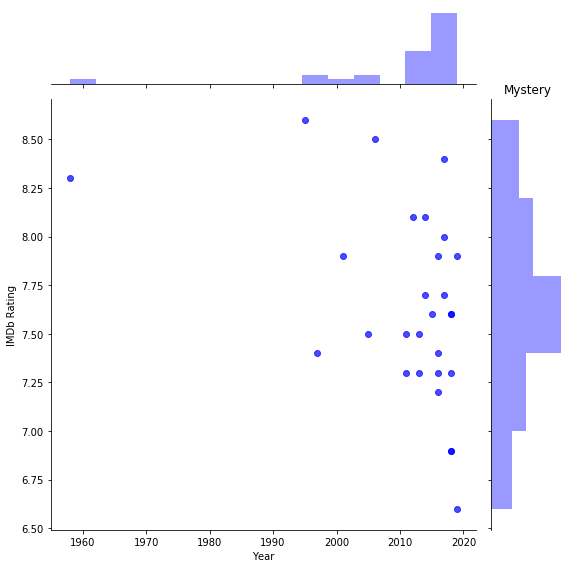

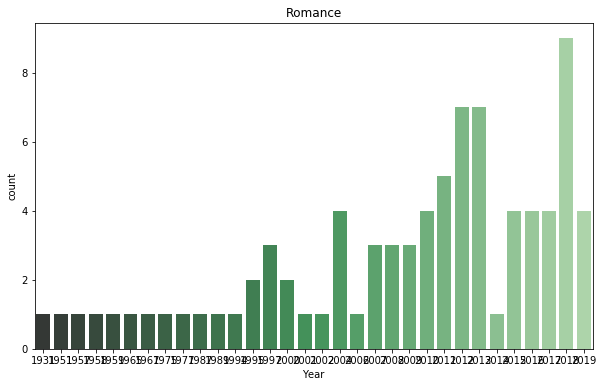

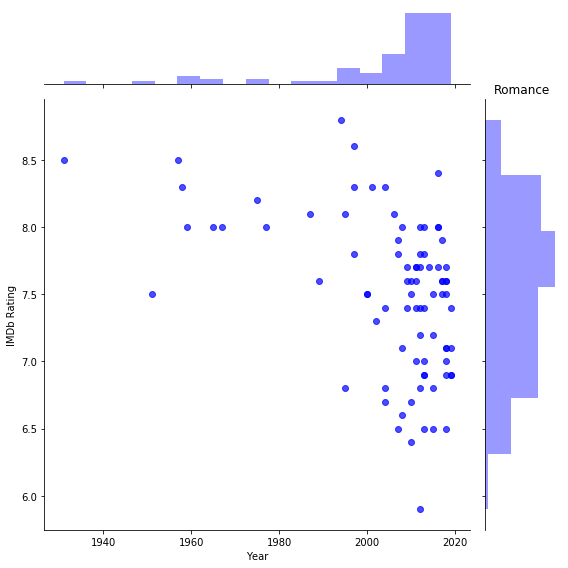

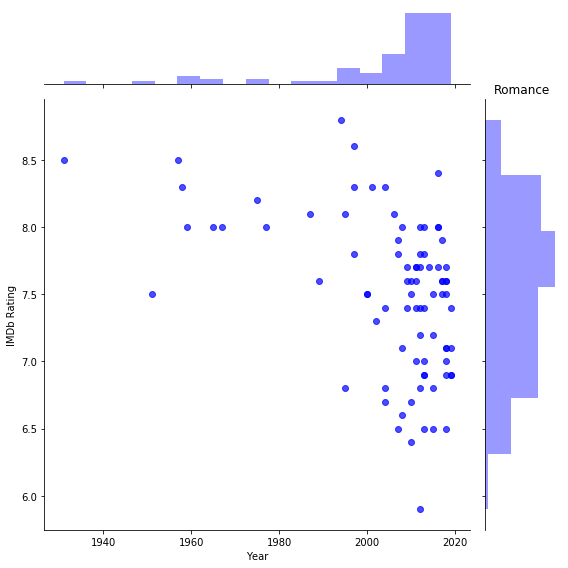

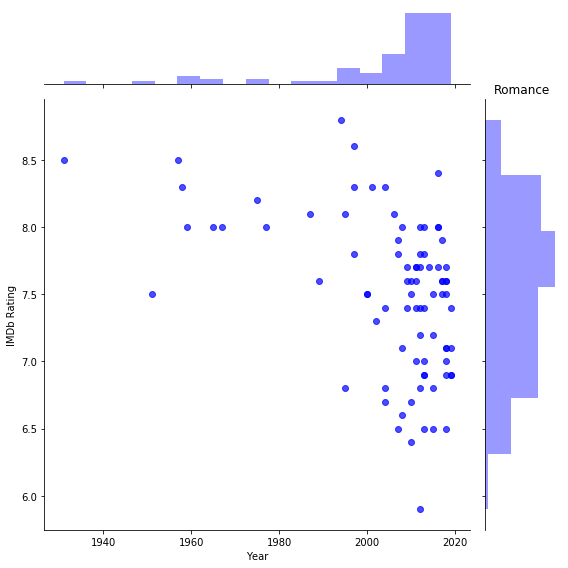

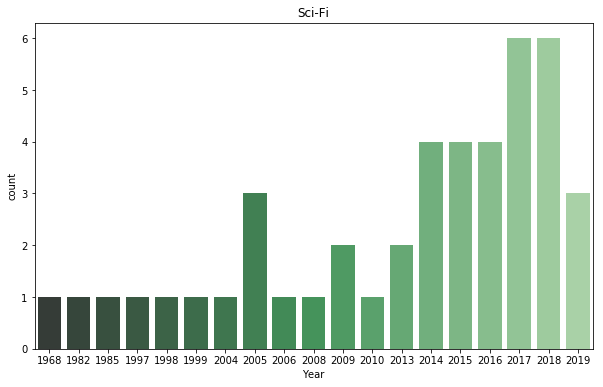

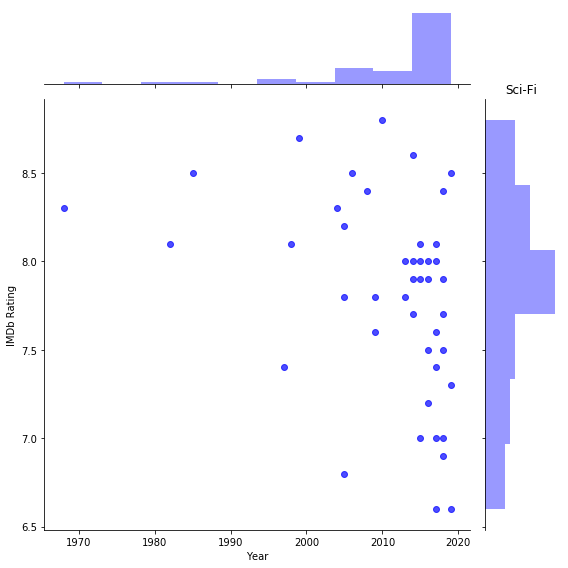

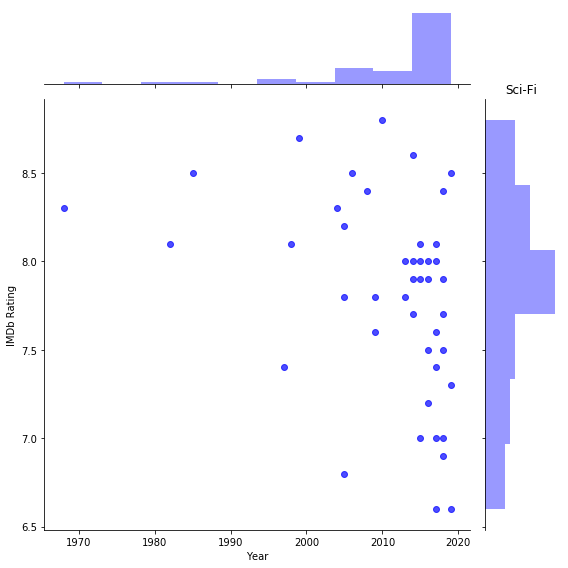

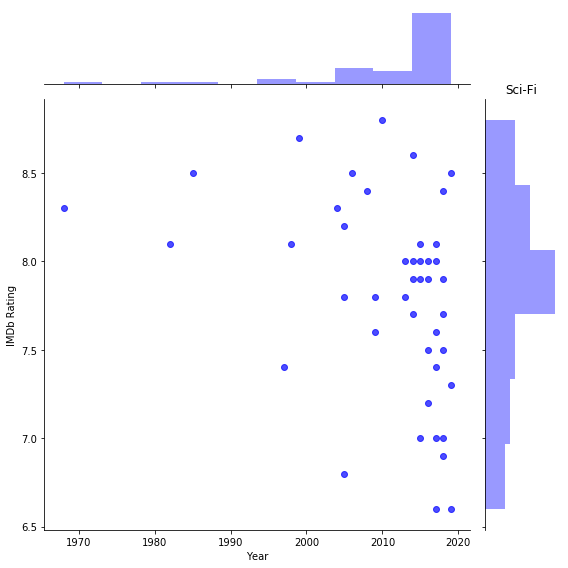

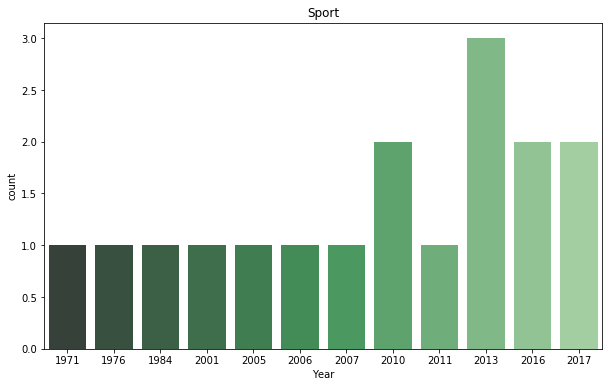

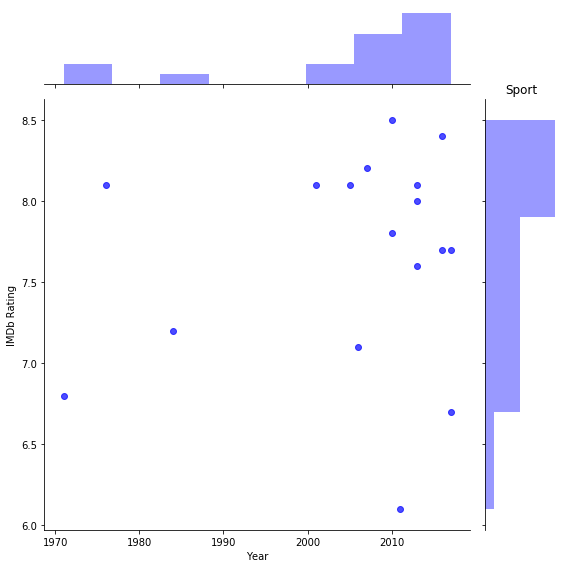

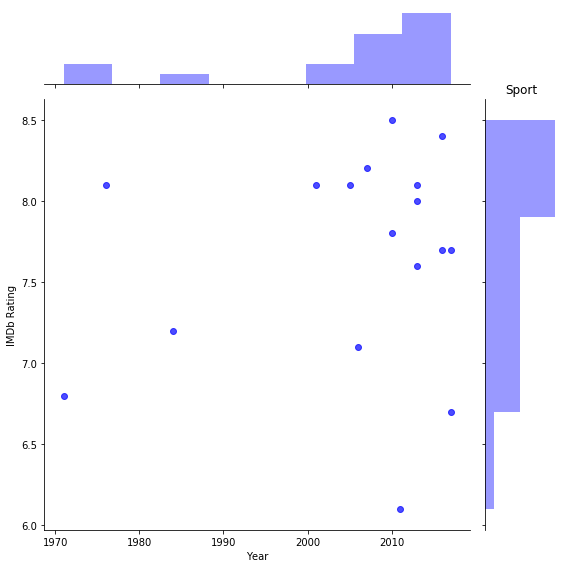

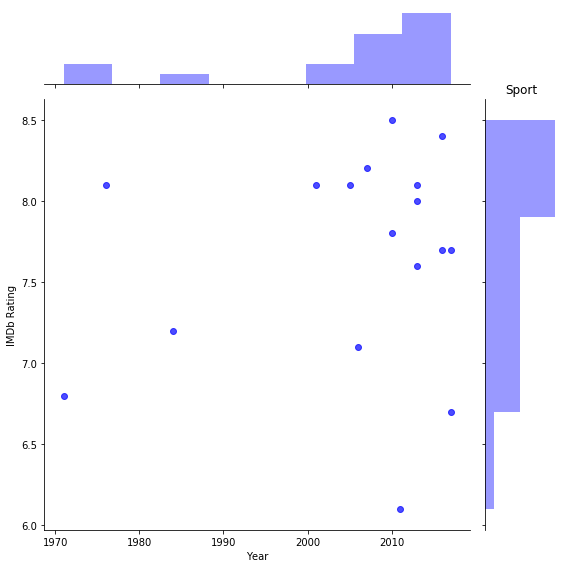

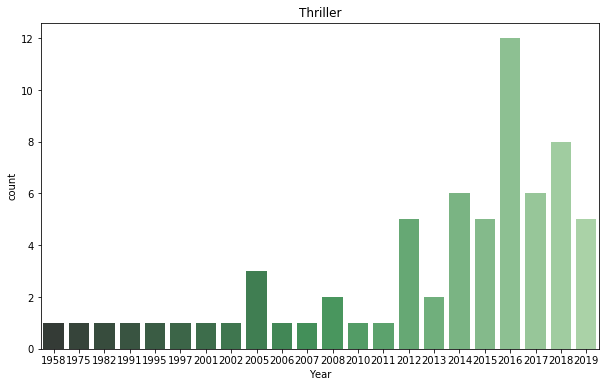

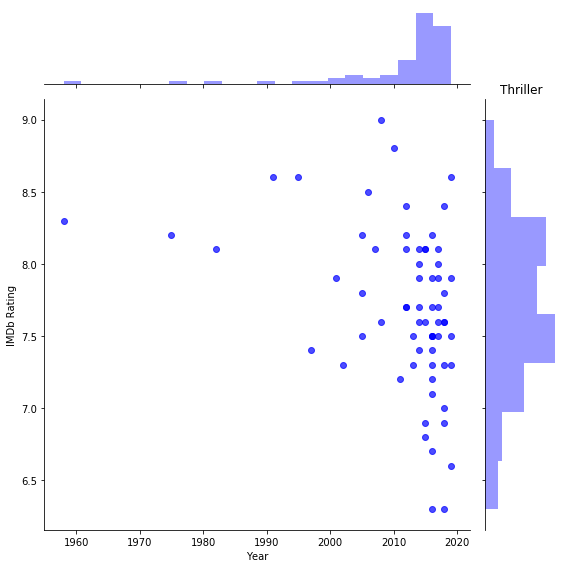

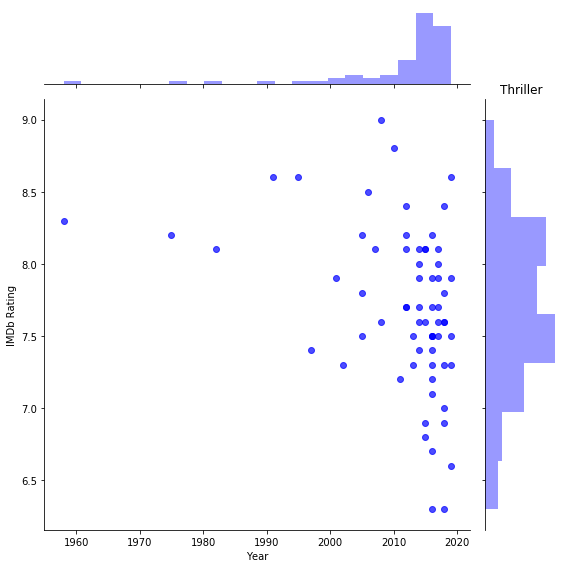

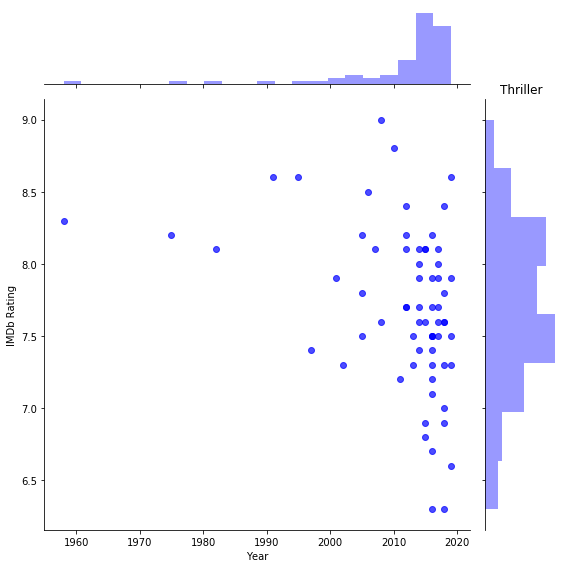

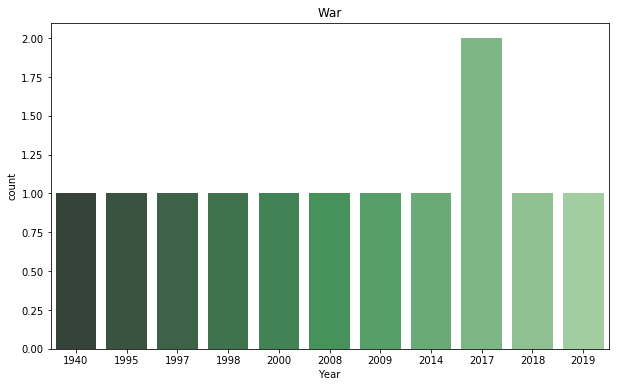

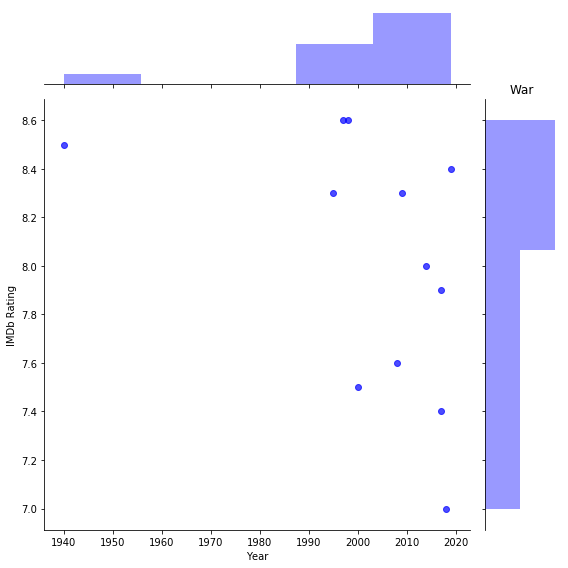

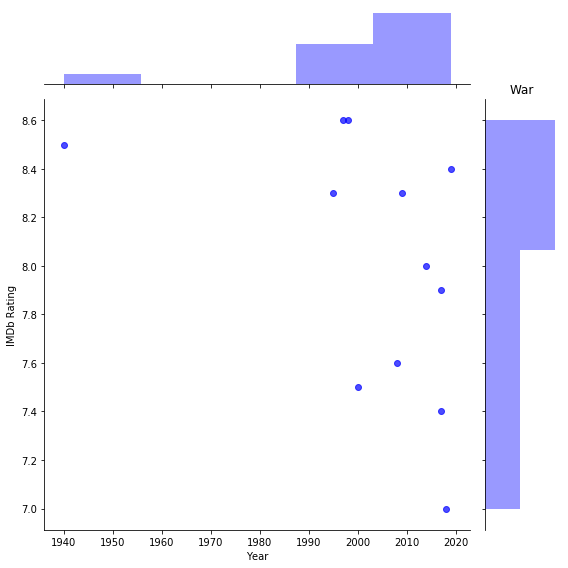

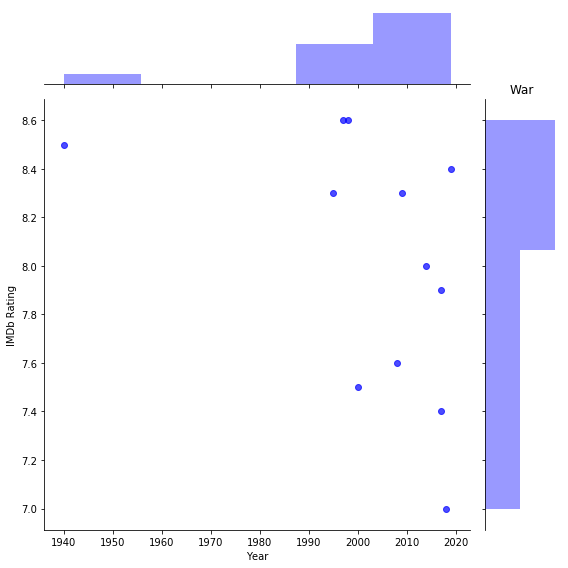

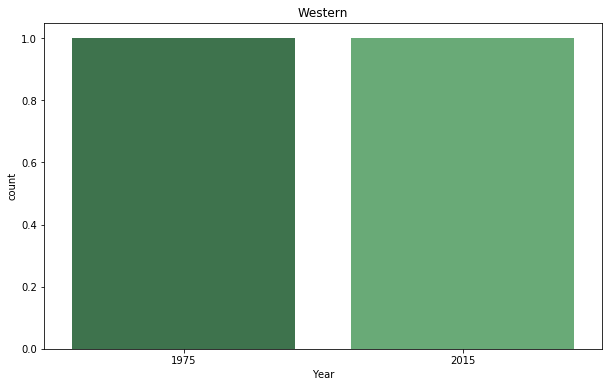

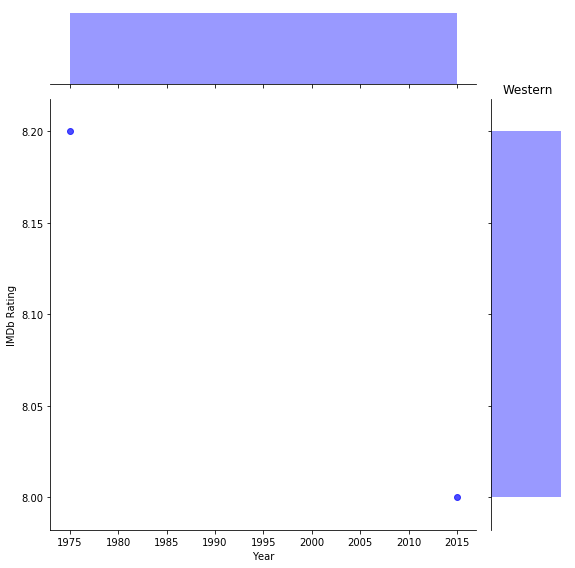

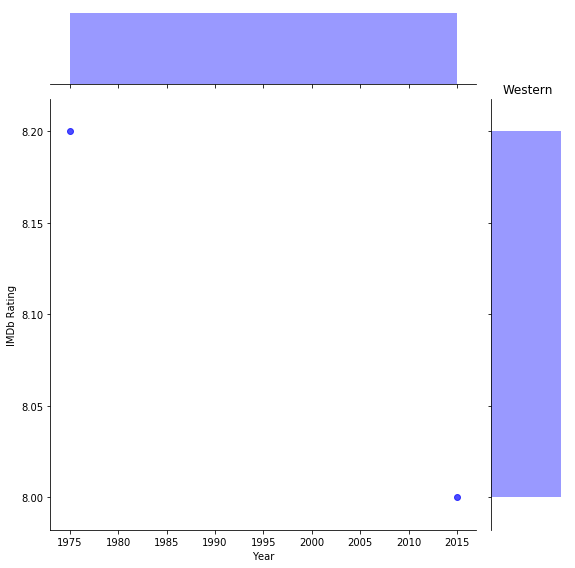

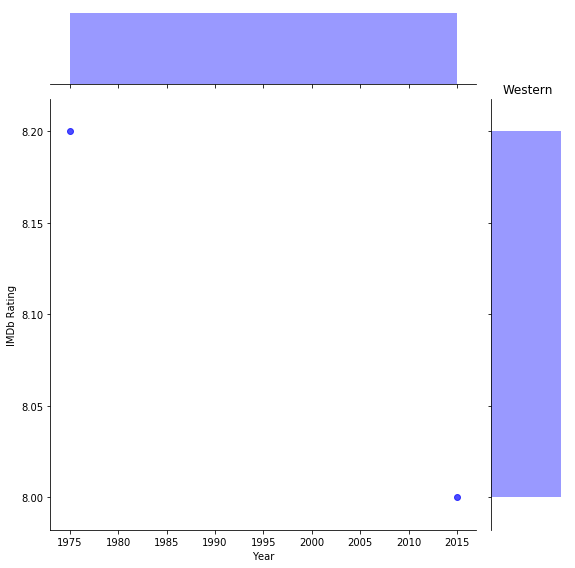

In [105]:
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
for genre in seperate_genre:
    df = ratings['Genres'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(ratings[df]))
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=ratings[df], palette="Greens_d");
    plt.title(genre)
    compare_movies_rating = [ 'Num Votes','IMDb Rating','Year']
    for compare in compare_movies_rating:
        sns.jointplot(x='Year' , y='IMDb Rating', data=ratings[df], alpha=0.7, color='b', size=8)
        plt.title(genre)